# Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

## Objective
the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

 

    -Importing necessary libraries and warnings

In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.impute import SimpleImputer

# Understanding the Data

In [3]:
#using the below syntax to display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [4]:
#read the data
inp0_app = pd.read_csv('application_data.csv', header = 0)
inp0_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
inp0_app.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

###    Get the basic information of the data

In [6]:
inp0_app.shape

(307511, 122)

In [7]:
inp0_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
inp0_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#  Missing values
    -Checking missing values 
    -Deleteing / Imputing missing values

In [9]:
#checking the total of missing values in each column
inp0_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#checking for percentage of missing values of each column
null_percentage = (inp0_app.isnull().sum()/inp0_app.shape[0])*100
null_percentage

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Identifying and dropping the columns with more than equal to 45% missing values

In [13]:
#Identifying the columns with more than 45% missing values
columns_to_drop = null_percentage[null_percentage >= 45].index
columns_to_drop

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [14]:
#Dropping the columns
inp0_app.drop(columns=columns_to_drop, inplace=True)

In [15]:
#checking the shape of the df again
inp0_app.shape

(307511, 73)

In [16]:
#checking for the null values after dropping the columns with null vals greater than 45%
null_percentage_0 = (inp0_app.isnull().sum()/inp0_app.shape[0])*100
null_percentage_0

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [17]:
inp0_app.shape

(307511, 73)

#### Imputing numeric columns with median and categorical columns with mode

    -identifying XNA values in the data

In [18]:

xna_counts = inp0_app.apply(lambda x: x[x == 'XNA'].count())
xna_counts

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        4
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

##### As observed above CODE GENDER and ORGANIZATION TYPE has XNA values
    -Treating XNA or unknown values as missing and imputing as required

In [21]:
# Identify columns with missing values
numeric_cols_missing_values = inp0_app.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_missing_values = inp0_app.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
numeric_imputer = SimpleImputer(strategy='median')
inp0_app[numeric_cols_missing_values] = numeric_imputer.fit_transform(inp0_app[numeric_cols_missing_values])

# Impute missing values in categorical columns with the most frequent category
categorical_imputer = SimpleImputer(strategy='most_frequent')
inp0_app[categorical_cols_missing_values] = categorical_imputer.fit_transform(inp0_app[categorical_cols_missing_values])

# Replacing occurrences of 'XNA' with the mode in categorical columns
for col in 'CODE_GENDER','ORGANIZATION_TYPE' :
    mode_value = inp0_app[col].mode()[0]
    inp0_app[col] = inp0_app[col].replace('XNA', mode_value)




    -confirming the missing value imputation

In [22]:
inp0_app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [23]:
inp0_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  float64
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

##### Dropping the unwanted columns as these columns will not affect the analysis hence, not required.

In [24]:
inp0_app.drop(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',                
'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',               
'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis = 1, inplace = True)

    -checking the shape after dropping

In [25]:
inp0_app.shape

(307511, 47)

In [26]:
inp0_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                    0.003541    -16765.0        -1188.0            -1186.0   
2                    0.010032    -19046.0         -225.0            -4260.0   
3                    0.008019    -19005.0        -3039.0            -9833.0   
4                    0.028663    -19932.0        -3038.0            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          -2120.0        Laborers              1.0                   2.0   
1           -291.0      Core staff              2.0                   1.0   
2          -2531.0        Laborers              1.0                   2.0   
3          -2437.0        Laborers              2.0                   2.0   
4          -3458.0      Core staff              1.0                   2.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                          2.0                  WEDNESDAY   
1                          1.0                     MONDAY   
2                          2.0                     MONDAY   
3                          2.0                  WEDNESDAY   
4                          2.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                     10.0                         0.0   
1                     11.0                         0.0   
2                      9.0                         0.0   
3                     17.0                         0.0   
4                     11.0                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   
2                     0.0                     0.0               

## Standardising the Data

###### As observed above, some of the columns have negative values, like DAYS BIRTH, DAYS EMPLOYED, DAYS REGISTRATION, which can't can't be negative hence changing them to absolute
    -Ensuring all observations under one variable are expressed in a common and consistent unit.
        -Converting days to year for consistency and better representation.

In [27]:
inp0_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = inp0_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()/365

In [28]:
inp0_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0   25.920548       1.745205           9.994521         5.808219   
1   45.931507       3.254795           3.249315         0.797260   
2   52.180822       0.616438          11.671233         6.934247   
3   52.068493       8.326027          26.939726         6.676712   
4   54.608219       8.323288          11.810959         9.473973   

   DAYS_LAST_PHONE_CHANGE  
0                3.106849  
1                2.268493  
2                2.232877  
3                1.690411  
4                3.030137

In [29]:
#Creating a new column as Age 
inp0_app['AGE'] = inp0_app['DAYS_BIRTH'].round()
inp0_app.AGE.head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: AGE, dtype: float64

##### creating bins for better representation

##### AGE

In [31]:
inp0_app.AGE.describe()

bins=[20,30,40,50,60,100]

slabs=['20 to 30','30 to 40','40 to 50','50 to 60','>60']
inp0_app['AGE_GROUP'] = pd.cut(inp0_app['DAYS_BIRTH'],bins,labels=slabs)


In [32]:
inp0_app.AGE_GROUP.value_counts()

30 to 40    82308
40 to 50    76541
50 to 60    68062
20 to 30    45021
>60         35579
Name: AGE_GROUP, dtype: int64

##### NAME_INCOME_TYPE

In [33]:
inp0_app["NAME_INCOME_TYPE"]=inp0_app["NAME_INCOME_TYPE"].replace(["Working","Commercial associate","State servant","Pensioner","Businessman","Maternity leave"],"Earning").replace(["Student","Unemployed"],"Not Earning")
inp0_app["NAME_INCOME_TYPE"].value_counts()

Earning        307471
Not Earning        40
Name: NAME_INCOME_TYPE, dtype: int64

##### ORGANISATION TYPE

In [34]:
inp0_app["ORGANIZATION_TYPE"]=inp0_app["ORGANIZATION_TYPE"].str.split("Type").str[0].str.split("type").str[0]
inp0_app["ORGANIZATION_TYPE"]=inp0_app["ORGANIZATION_TYPE"].replace(["Military","Police","Postal","Security Ministries","Electricity"],"Government").replace(["Bank","Security","Insurance","Legal Services"],"BFSI").replace(["Kindergarten","University","School"],"Education").replace(["Construction","Housing"],"Realtor")
inp0_app["ORGANIZATION_TYPE"]=inp0_app["ORGANIZATION_TYPE"].replace(["Military","Police","Postal","Security Ministries","Electricity"],"Government").replace(["Bank","Security","Services","Insurance","Legal Services"],"BFSI").replace(["Medicine","Emergency"],"Healthcare").replace(["Restaurant","Hotel"],"Hospitality")
inp0_app["ORGANIZATION_TYPE"].value_counts()

Business Entity     139903
Self-employed        38412
Government           20460
Education            17100
Other                16683
Trade:               14315
Industry:            14311
Healthcare           11753
Realtor              10075
Transport:            8990
BFSI                  8231
Hospitality           2777
Agriculture           2454
Telecom                577
Advertising            429
Culture                379
Mobile                 317
Cleaning               260
Religion                85
Name: ORGANIZATION_TYPE, dtype: int64

##### NAME_TYPE_SUITE

In [35]:
inp0_app["NAME_TYPE_SUITE"]=inp0_app["NAME_TYPE_SUITE"].replace(["Family","Spouse, partner","Children"],"Family").replace(["Other_B","Other_A","Group of people"],"Other").replace("Unaccompanied","Alone")
inp0_app["NAME_TYPE_SUITE"].value_counts()

Alone     249818
Family     54786
Other       2907
Name: NAME_TYPE_SUITE, dtype: int64

##### NAME FAMILY STATUS

In [116]:
inp0_app["NAME_FAMILY_STATUS"]=inp0_app["NAME_FAMILY_STATUS"].replace(["Single / not married","Separated","Widow"],"Un-married").replace(["Civil marriage","Unknown"],"Married")
inp0_app["NAME_FAMILY_STATUS"].value_counts()

Married       226209
Un-married     81302
Name: NAME_FAMILY_STATUS, dtype: int64

In [36]:
#checking all the numeric and categorical columns
numeric_cols = inp0_app.select_dtypes('float', 'int').columns
categorical_cols = inp0_app.select_dtypes('object', 'category').columns
print('numeric_cols:',numeric_cols)

print('categorical_cols:',categorical_cols)


numeric_cols: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'],
      dtype='object')
categorical_cols: Index(

##### Converting below columns to category type as these columns are observational with 0 and 1 values and can be represented as yes/no in categorical columns

In [54]:
#OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
# While looking to these data these are all count values These columns represent counts,it might make sense to impute the missing values with zeros, 
#assuming that clients with missing values have no observable or defaulted connections within the specified time frames.

columns_to_impute = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for column in columns_to_impute:
    inp0_app[column].fillna(0, inplace=True)


In [55]:
inp0_app["OBS_30_CNT_SOCIAL_CIRCLE"]=inp0_app["OBS_30_CNT_SOCIAL_CIRCLE"].astype("category")
inp0_app["DEF_30_CNT_SOCIAL_CIRCLE"]=inp0_app["DEF_30_CNT_SOCIAL_CIRCLE"].astype("category")
inp0_app["OBS_60_CNT_SOCIAL_CIRCLE"]=inp0_app["OBS_60_CNT_SOCIAL_CIRCLE"].astype("category")
inp0_app["DEF_60_CNT_SOCIAL_CIRCLE"]=inp0_app["DEF_60_CNT_SOCIAL_CIRCLE"].astype("category")
inp0_app["AMT_REQ_CREDIT_BUREAU_HOUR"]=inp0_app["AMT_REQ_CREDIT_BUREAU_HOUR"].astype("category")
inp0_app["AMT_REQ_CREDIT_BUREAU_DAY"]=inp0_app["AMT_REQ_CREDIT_BUREAU_DAY"].astype("category")
inp0_app["AMT_REQ_CREDIT_BUREAU_WEEK"]=inp0_app["AMT_REQ_CREDIT_BUREAU_WEEK"].astype("category")
inp0_app["AMT_REQ_CREDIT_BUREAU_MON"]=inp0_app["AMT_REQ_CREDIT_BUREAU_MON"].astype("category")
inp0_app["AMT_REQ_CREDIT_BUREAU_QRT"]=inp0_app["AMT_REQ_CREDIT_BUREAU_QRT"].astype("category")
inp0_app["AMT_REQ_CREDIT_BUREAU_YEAR"]=inp0_app["AMT_REQ_CREDIT_BUREAU_YEAR"].astype("category")

In [56]:
#making lists of numerical and categorical columns
Categorical_cols=inp0_app.select_dtypes(["object","category"]).columns.to_list()
Numeric_cols=inp0_app.select_dtypes(["float","int"]).columns.to_list()

In [57]:
#dropping SKD_ID from numeric columns as these are the unique id's of the customers and thus, removing it from the list.
Numeric_cols.remove("SK_ID_CURR")


In [77]:
#dropping Target from numeric columns list as well
Numeric_cols.remove("TARGET")
Numeric_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AGE']

In [78]:
Categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE_GROUP']

## Ratio Imbalance

In [58]:
#checking data distribution 
inp0_app.TARGET.skew()
#As seen, data is heavily right skewed

3.0781586659196685

In [59]:
#checking the counts of 0- clients with no difficulty in payment/ 1- clients with difficulty in payment 

inp0_app['TARGET'].value_counts(normalize=True)*100



0.0    91.927118
1.0     8.072882
Name: TARGET, dtype: float64

In [60]:
#ratio imbalance
ratio_imbalance = round((91.927118/ 8.072882),2)
ratio_imbalance

11.39

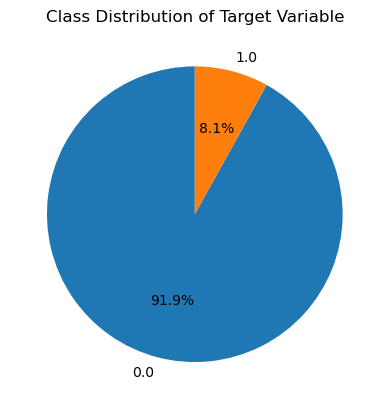

In [61]:
# Creating a pie chart for the representation of data imbalance
distribution = inp0_app['TARGET'].value_counts()
#sns.set_palette("coolwarm")
plt.rcdefaults()
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of Target Variable')
plt.show()

# Outlier Detection 

In [62]:
#Inspecting Amount Income column
inp0_app.AMT_INCOME_TOTAL.describe()


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [63]:
inp0_app.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [64]:
#Creating bins for Amount Income column

bins = [25650, 76000, 113500, 136000, 157800, 190000, 202600, 227000, 117000000]
labels = ['25k to 76k','76k to 113.5k','113.5k to 136k','136k to 157.8k','157.8k to 190k','190k to 202.6k','202.6k to 227k','227k to 117M']


inp0_app['AMT_INCOME_RANGE'] = pd.cut(inp0_app['AMT_INCOME_TOTAL'], bins=bins, labels=labels)



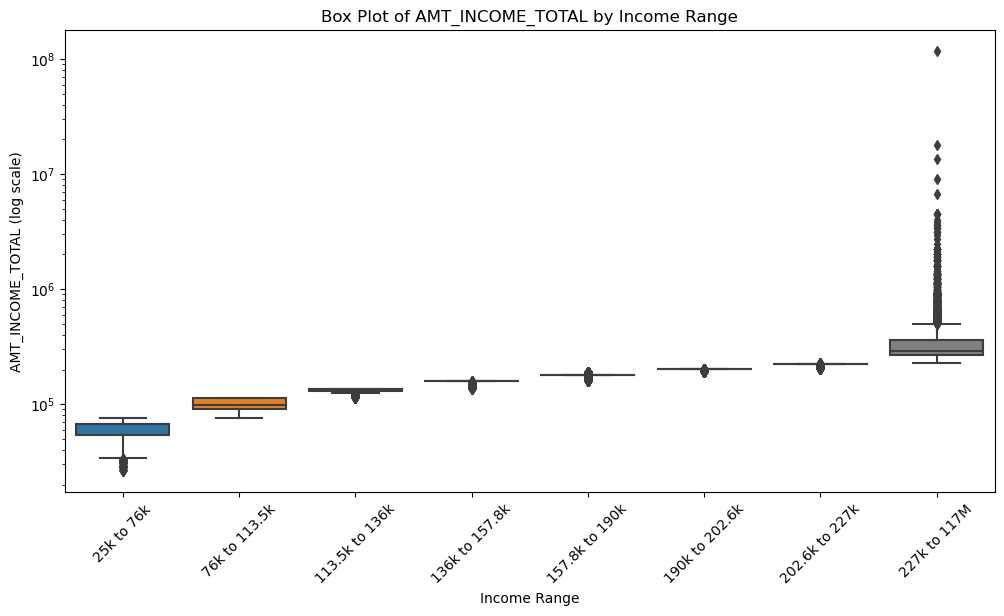

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AMT_INCOME_RANGE', y='AMT_INCOME_TOTAL', data=inp0_app)
plt.yscale('log')  # Log scale for better visualization of the data of wide range
plt.xticks(rotation=45)
plt.xlabel('Income Range')
plt.ylabel('AMT_INCOME_TOTAL (log scale)')
plt.title('Box Plot of AMT_INCOME_TOTAL by Income Range')
plt.show()

###### as observed from above boxplot that AMT_INCOME_TOTAL has outlier, it could be due to incorrect data entry, having said that, it will require further analysis

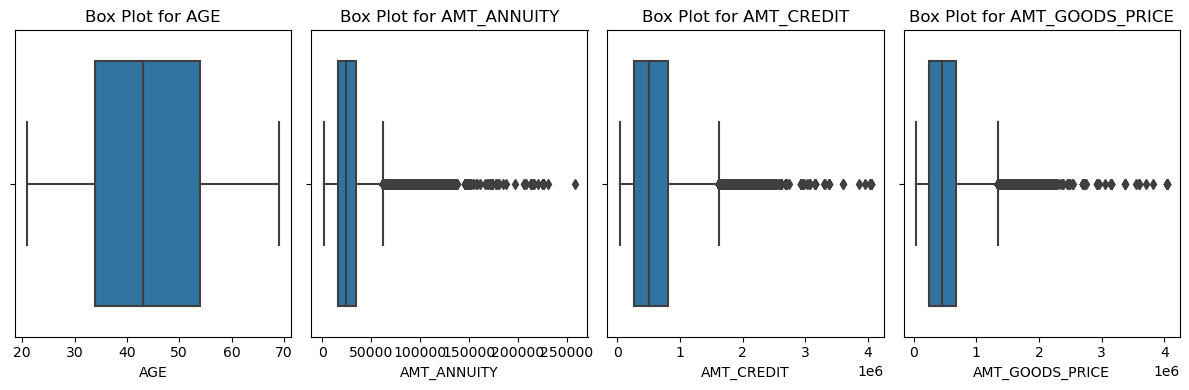

In [66]:
#Creating box plot for numeric columns of interest
columns_to_plot = ['AGE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE' ]
fig, axes = plt.subplots(nrows=1,ncols=len(columns_to_plot), figsize=(12, 4))

# Loop through the columns and create box plots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=inp0_app[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

-As observed from above boxplots that outliers are detected, it can be treated with the upper limit or lower limit values

# Analysis

### Univariate Analysis

#### Let's begin by diving the df into separate dataframes of (0- client with no payment difficulties and 1- with difficulty), for better analysis of both the categories

In [67]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

Non_Defaulters=inp0_app.loc[inp0_app["TARGET"]==0]
Defaulters=inp0_app.loc[inp0_app["TARGET"]==1]

In [68]:
Non_Defaulters.shape

(282686, 50)

In [69]:
Defaulters.shape

(24825, 50)

### Univariate Categorical Analysis

In [ ]:
#Categorical Analysis of Defaulters and Non-Defaulters through count plots 

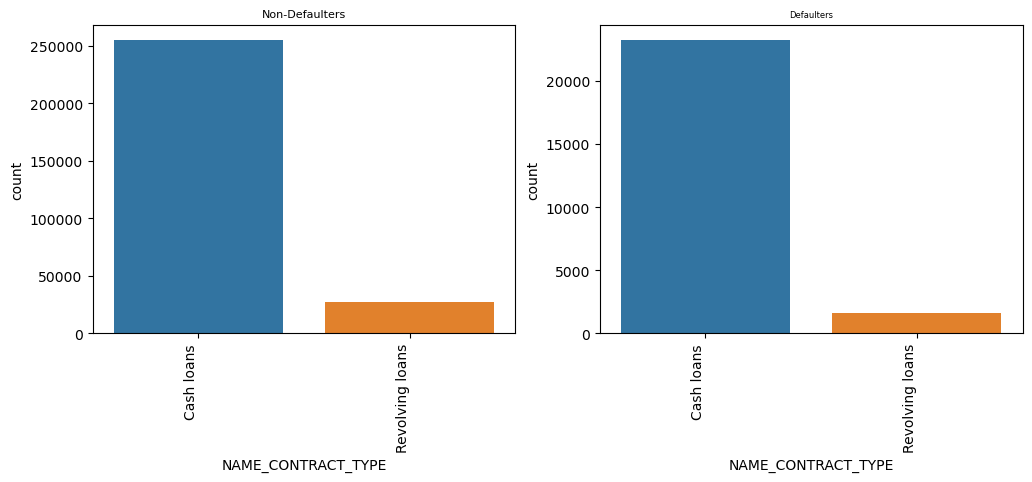

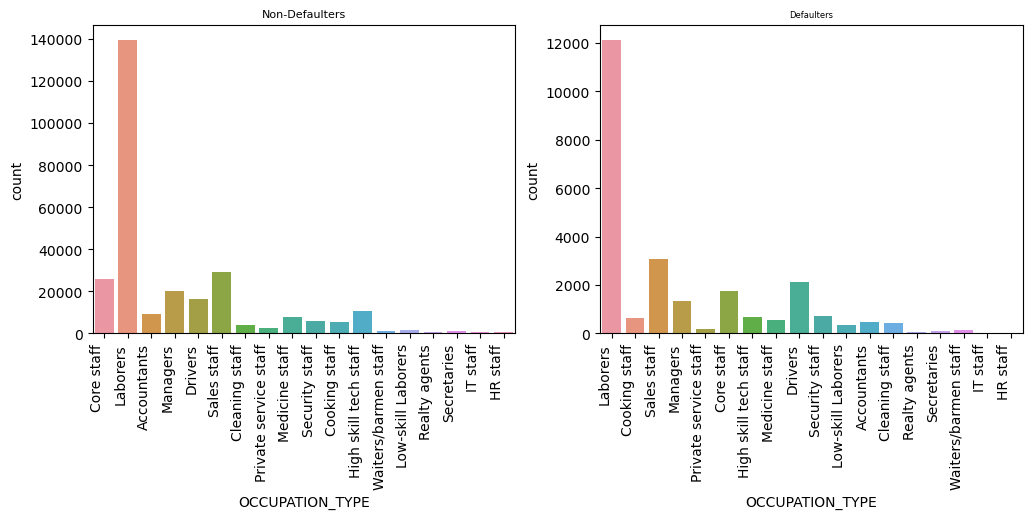

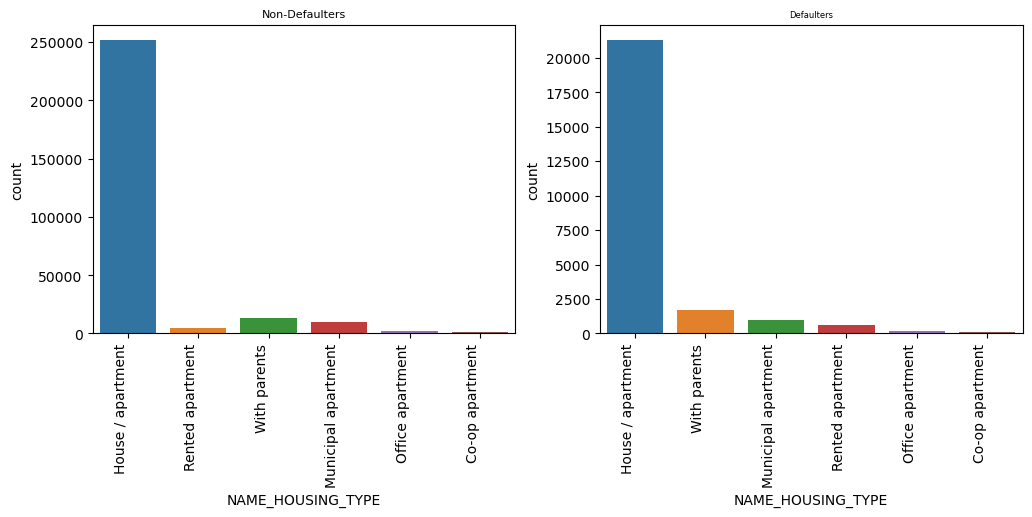

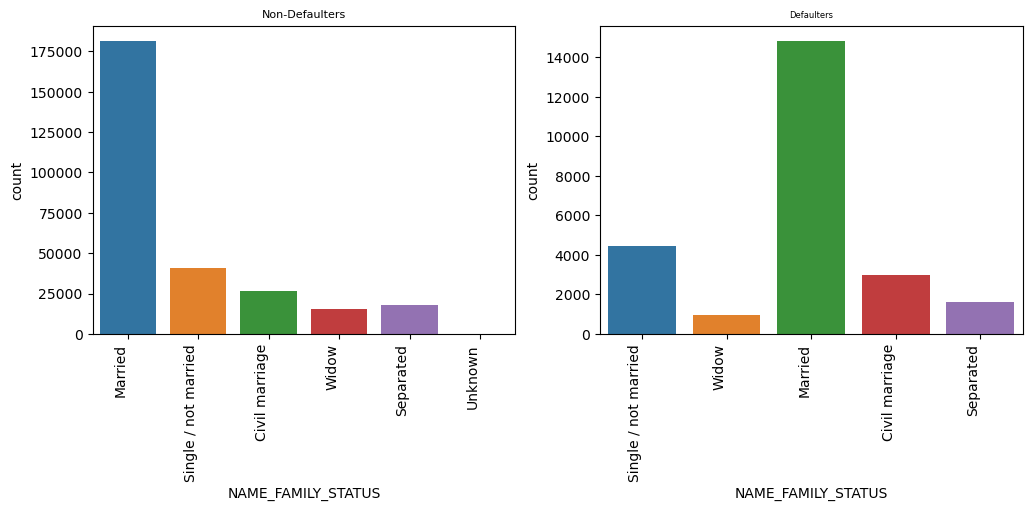

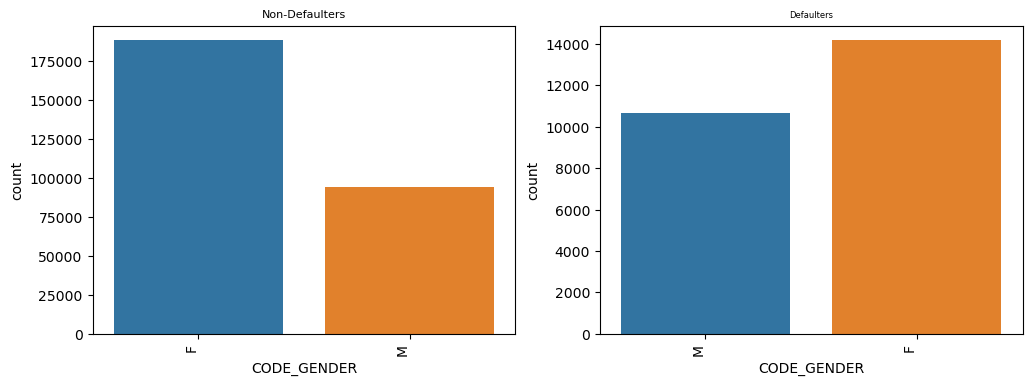

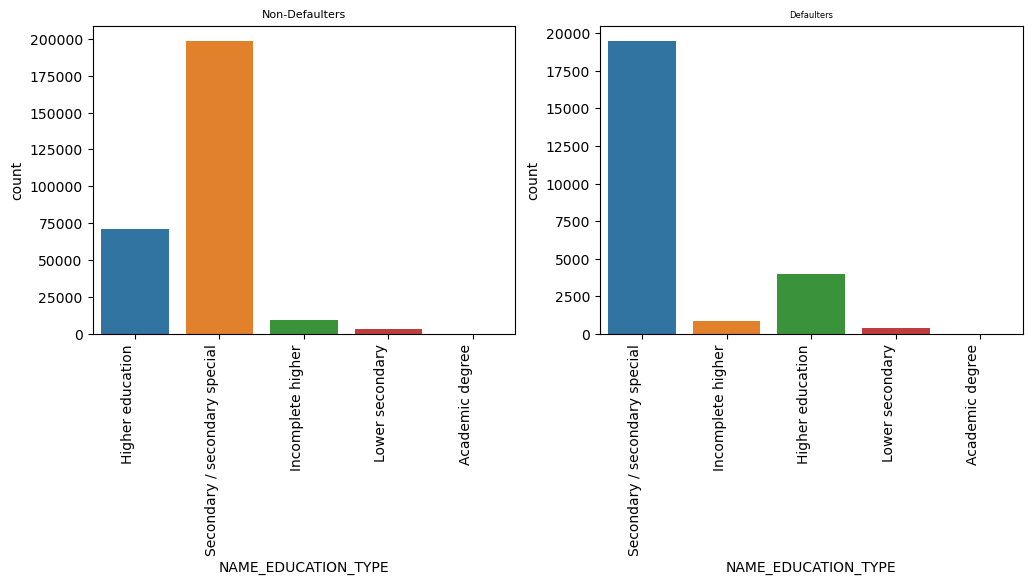

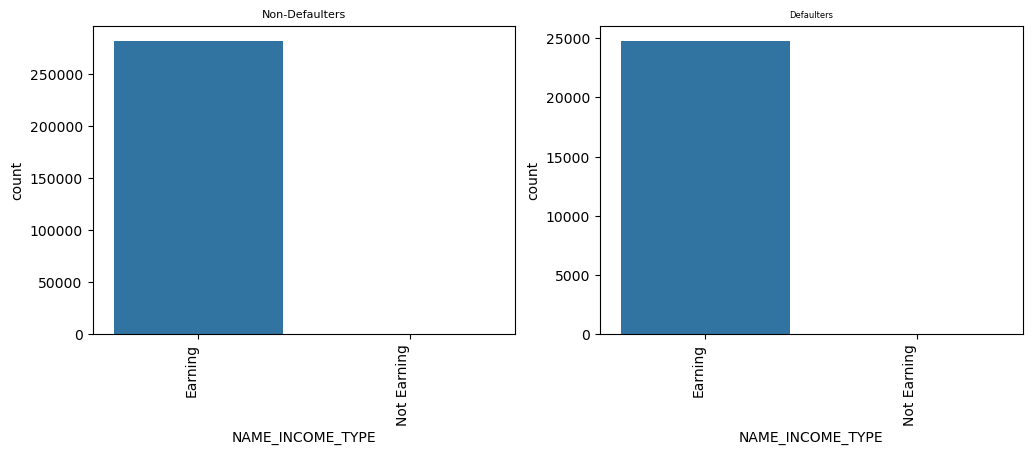

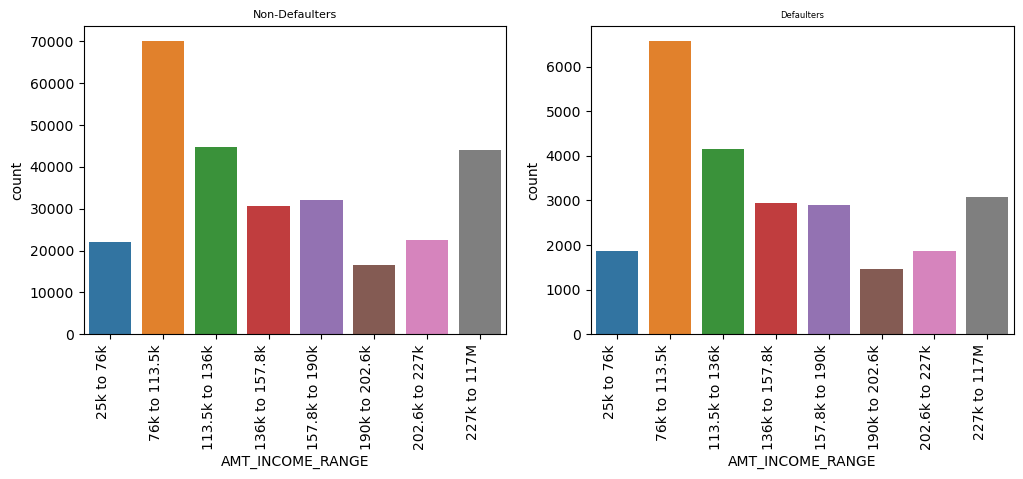

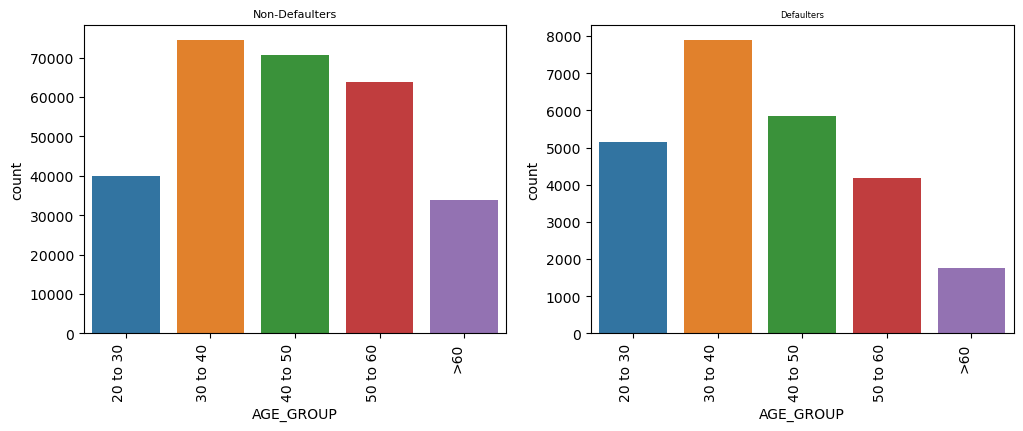

In [72]:
cols=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','AMT_INCOME_RANGE','AGE_GROUP' ]

for i in cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.countplot(x=Non_Defaulters[i])
    plt.title('Non-Defaulters',size=8)
    plt.xticks(rotation=90, ha = 'right')
    plt.subplot(1,2,2)
    sns.countplot(x=Defaulters[i])
    plt.title('Defaulters',size=6)
    plt.xticks(rotation=90, ha = 'right')
    plt.show()
    

###### insights we get from above counter plots.

1.We can see that customer without payment difficulties and customer with payment difficulties are taking more cash loans.

2.As observed that labourers are taking more loan in both datasets.

3.Observed that House/Apartment category are more in number in both cases.

4.We can say that people who are married taking more loan in both cases.

5.Here we can observe that people who are in secondary class taking more loan in both cases.

6.Here we can conclude that male candidates are facing more payment difficulties as compared to female candidates.

7.People who ar working taking more loan in both datsets.

### Numerical

In [79]:
Numeric_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AGE']

##### Univariate Analysis for continous variables

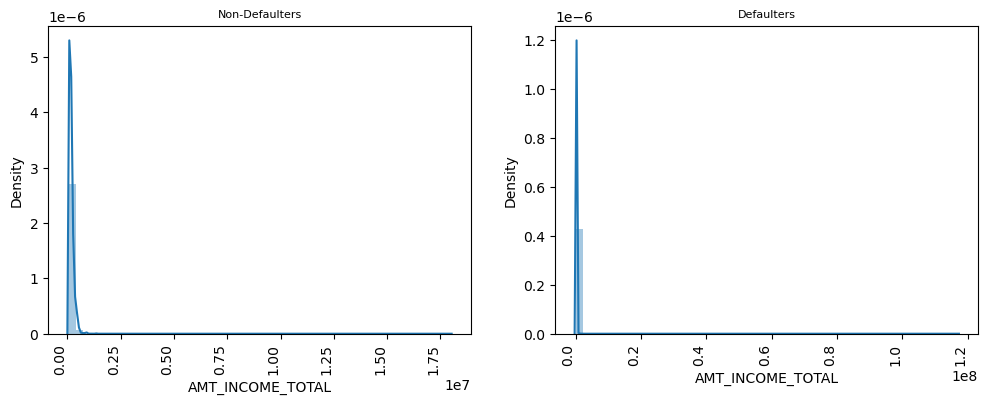

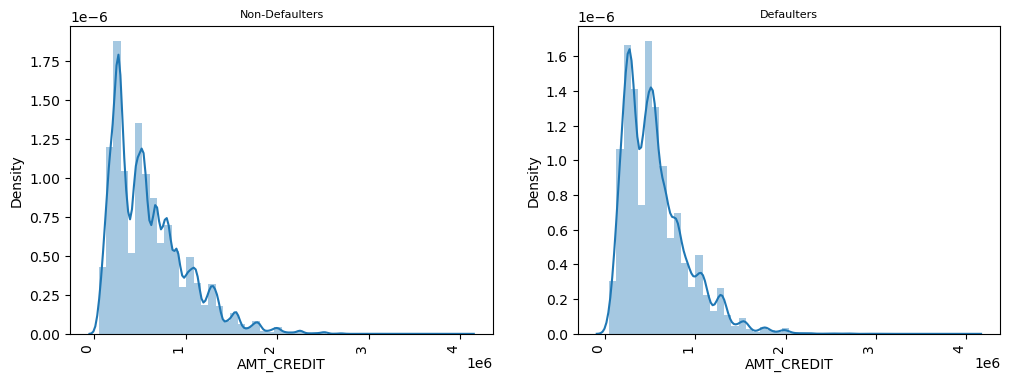

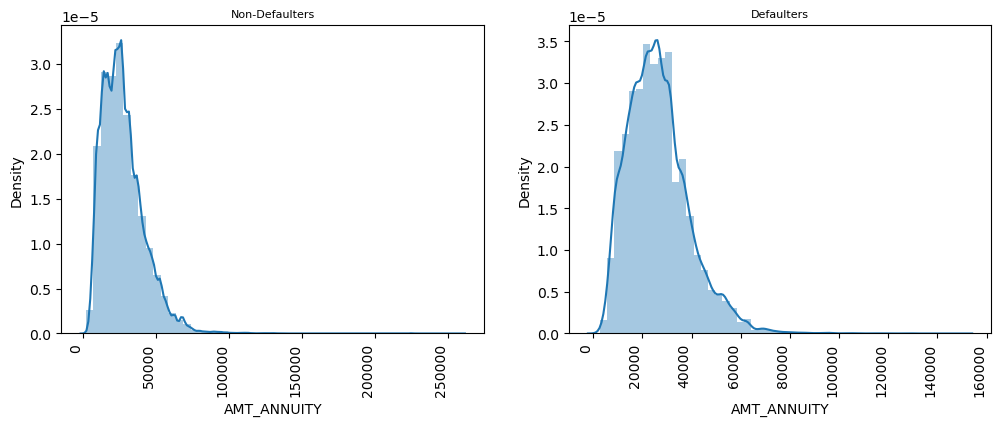

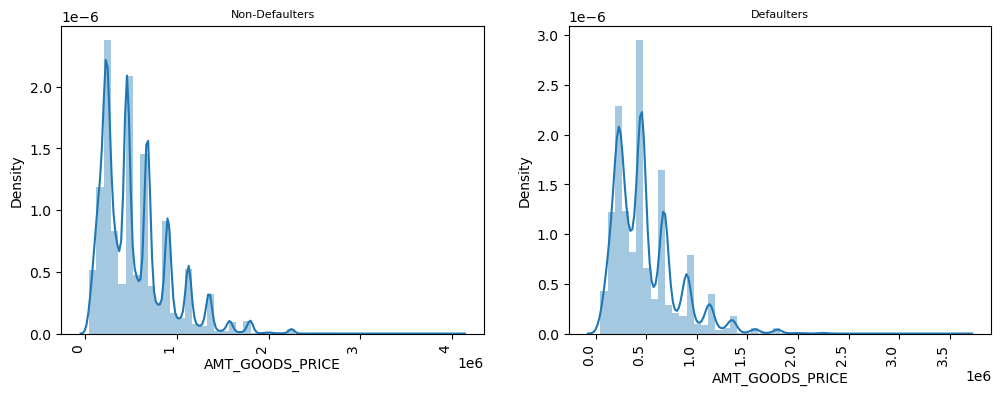

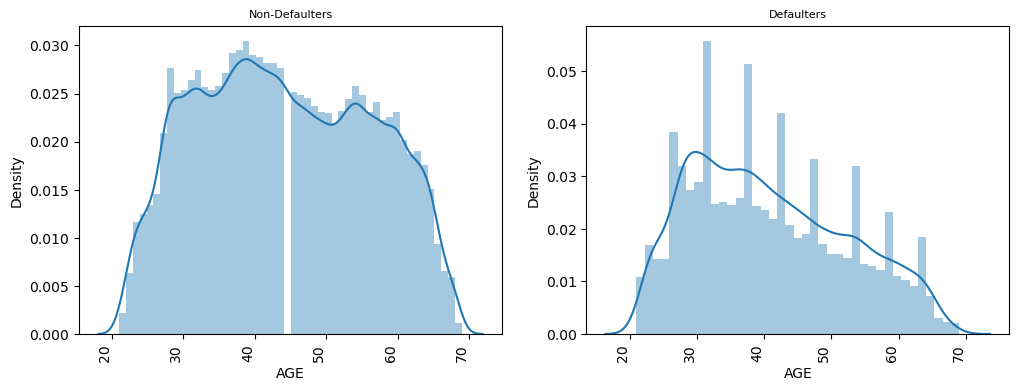

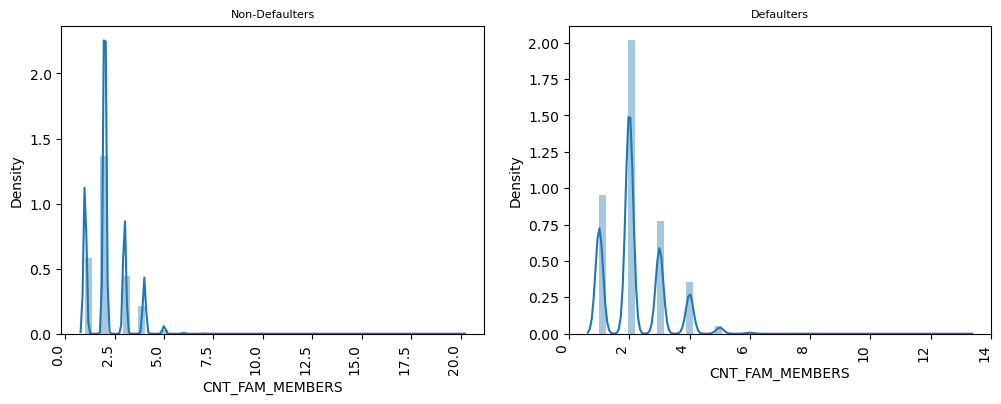

In [80]:
#numerical
cols=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE','CNT_FAM_MEMBERS']
for i in cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(Non_Defaulters[i])
    plt.title('Non-Defaulters', size = 8)
    plt.xticks(rotation = 90, ha = 'right')
    plt.subplot(1,2,2)
    sns.distplot(Defaulters[i])
    plt.title('Defaulters', size = 8)
    plt.xticks(rotation = 90, ha = 'right')
    
    plt.show()

# Bivariate analysis for dataframes target_0 and target_1
    -Visualize the distribution of age for each target category in both dataframes
    -Explore the relationship between gender and the target variable.
    -Visualize the distribution of education types for each target category.
    -Explore Income range with target.

##### correlation matrix of customers with no payment difficulties, Target=0

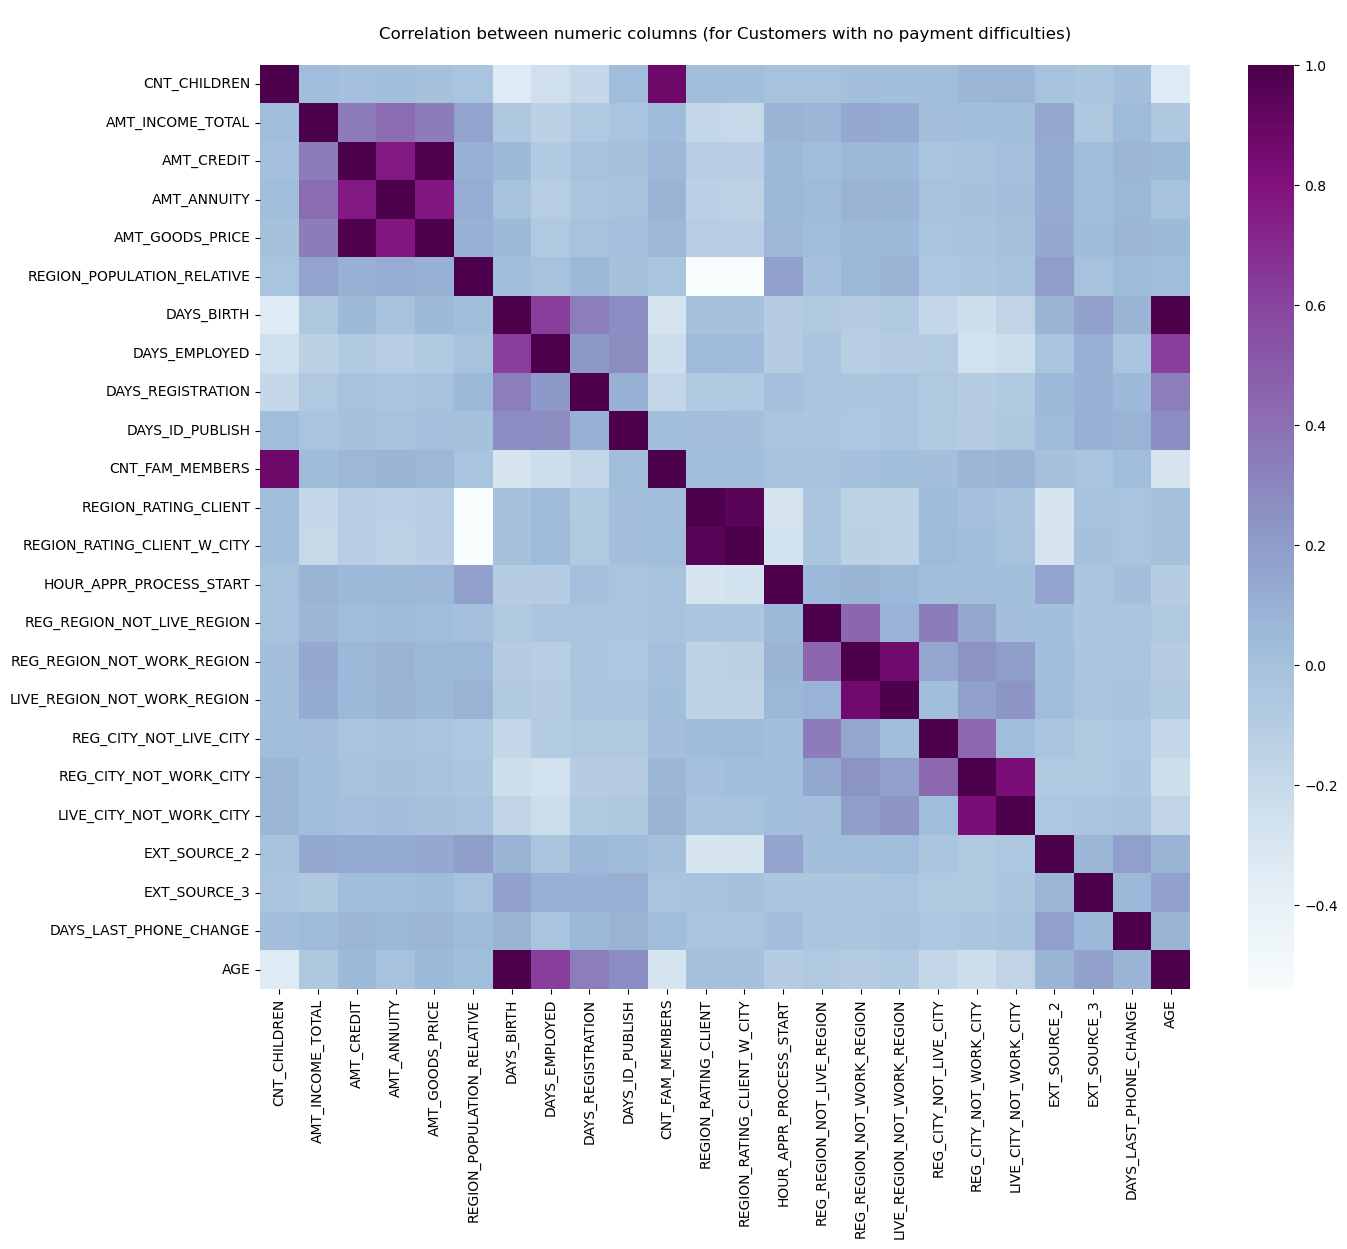

In [83]:
plt.figure(figsize=(15,12))
sns.heatmap(data=Non_Defaulters[Numeric_cols].corr(),cmap="BuPu")
plt.title("\nCorrelation between numeric columns (for Customers with no payment difficulties)\n")
plt.show()

###### Highly corelate columns for non defaulters

AMT_CREDIT and AMT_ANNUITY

AMT_CREDIT and AMT_GOODS_PRICE

AMT_ANNUITY and AMT_GOODS_PRICE 

##### correlation matrix of customers with no payment difficulties, Target=1

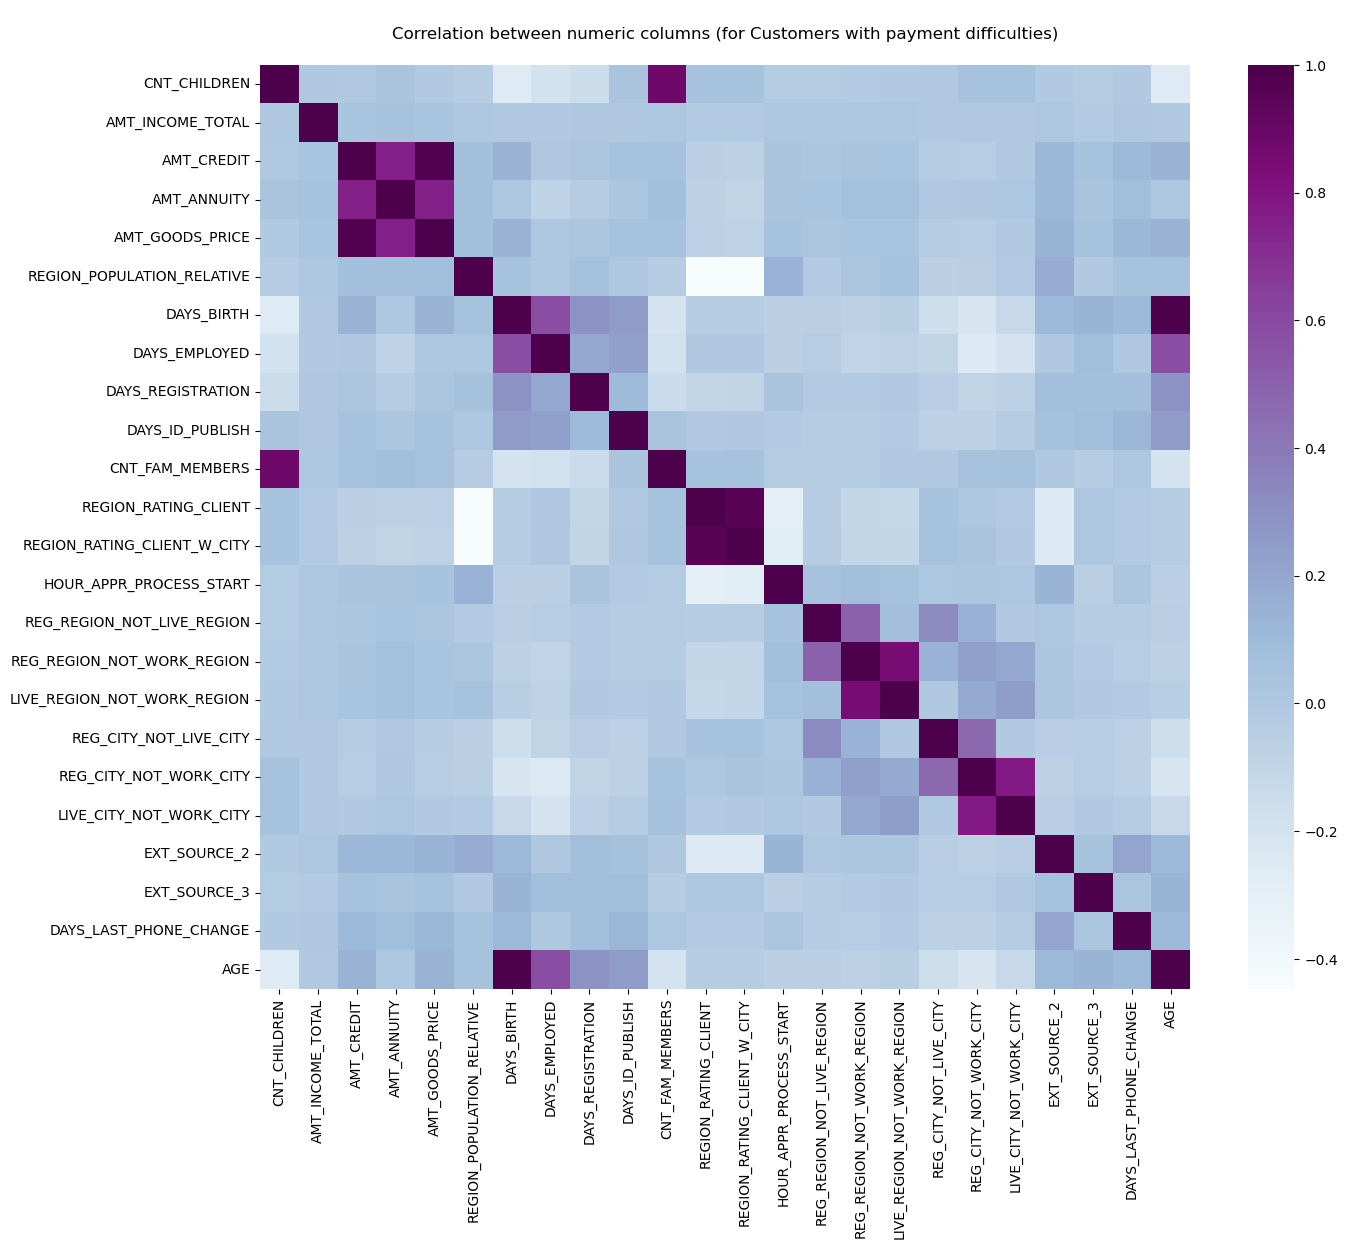

In [84]:
plt.figure(figsize=(15,12))
sns.heatmap(data=Defaulters[Numeric_cols].corr(),cmap="BuPu")
plt.title("\nCorrelation between numeric columns (for Customers with payment difficulties)\n")
plt.show()

###### Highly corelate columns for defaulters

AMT_CREDIT and AMT_ANNUITY 

AMT_CREDIT and AMT_GOODS_PRICE 

AMT_ANNUITY and AMT_GOODS_PRICE 

##### Creating pair plot on all amount related columns along with age

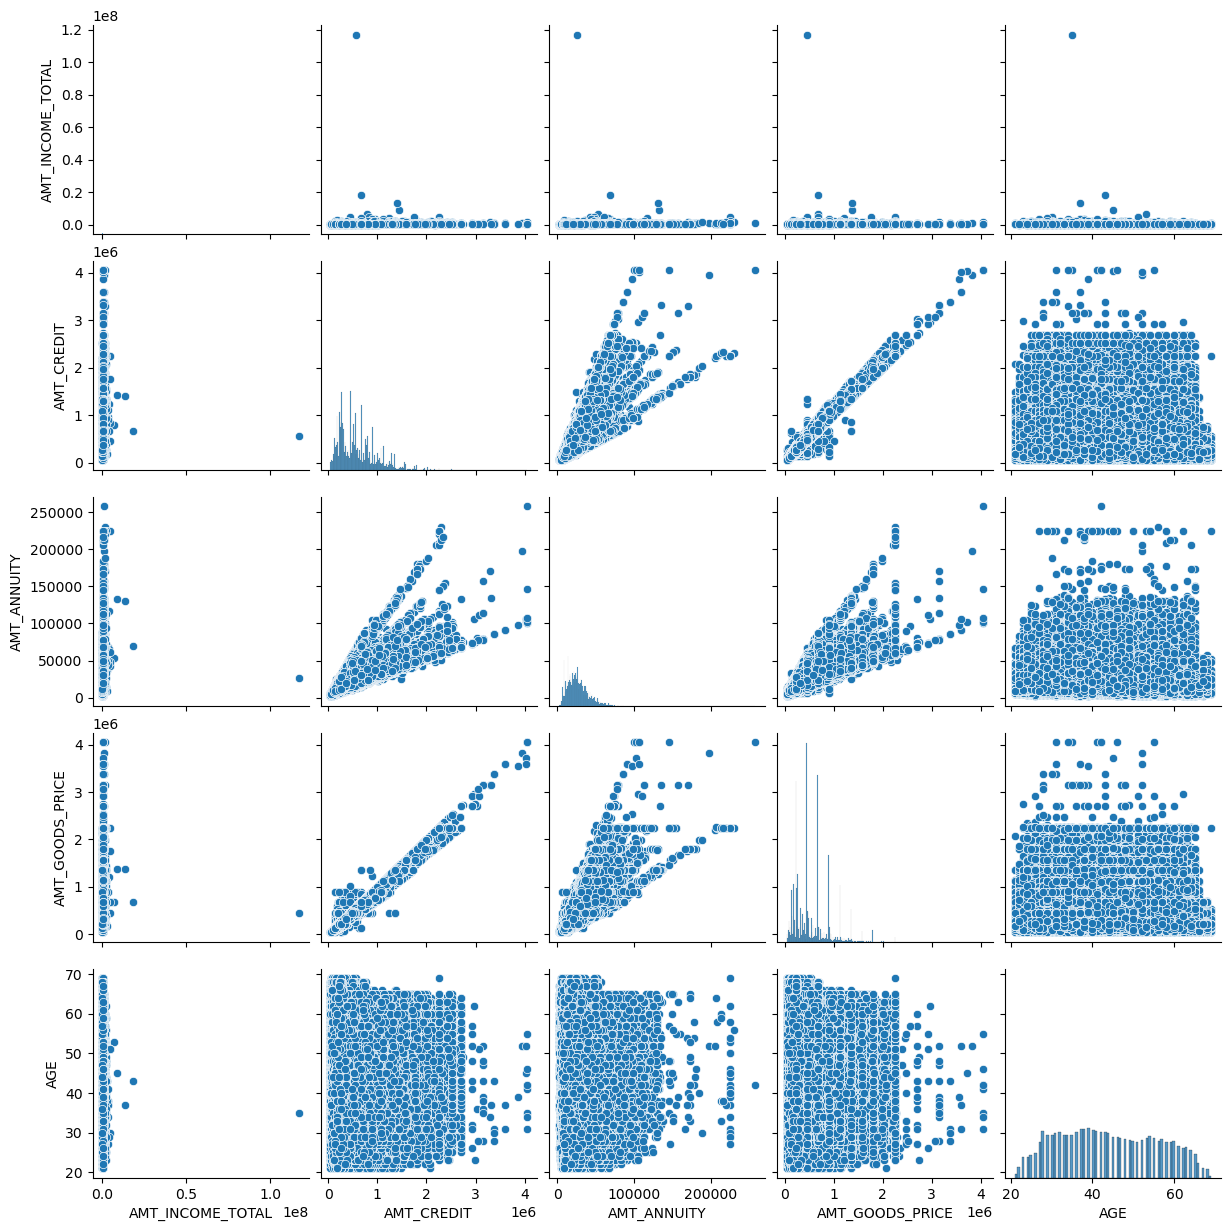

In [223]:
cols=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE']
sns.pairplot(inp0_app[cols])
plt.show()

##### Bivariate for Amount Credit with respect to the Amount income total of both the genders

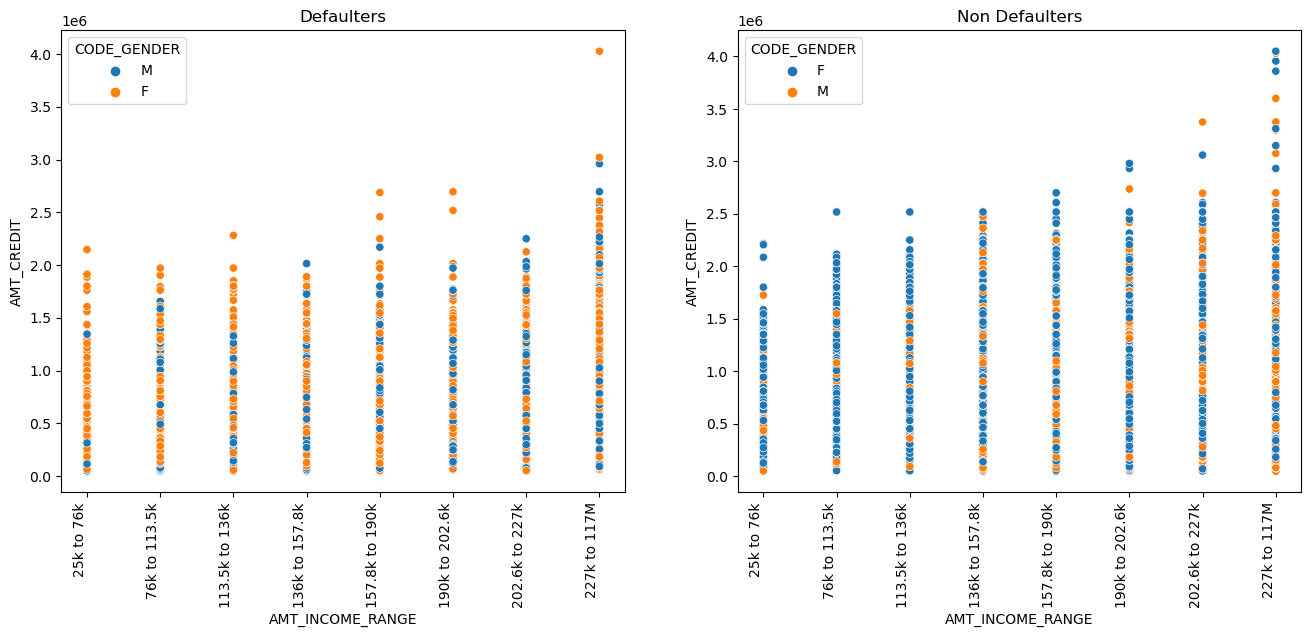

In [93]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(x='AMT_INCOME_RANGE', y='AMT_CREDIT', hue='CODE_GENDER', data=Defaulters)
plt.title('Defaulters')
plt.xticks(rotation = 90, ha = 'right')
plt.subplot(1, 2, 2)
ax = sns.scatterplot(x='AMT_INCOME_RANGE', y='AMT_CREDIT', hue='CODE_GENDER', data=Non_Defaulters)
plt.title('Non Defaulters')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

    
    
 

###### Analysis
Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.

Non defaulters - We can hardly figure out any pattern out of this.

##### Bivariate Categorical Analysis
Amount Credit for all the categories

In [98]:
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','AMT_INCOME_RANGE']

##### Defaulters

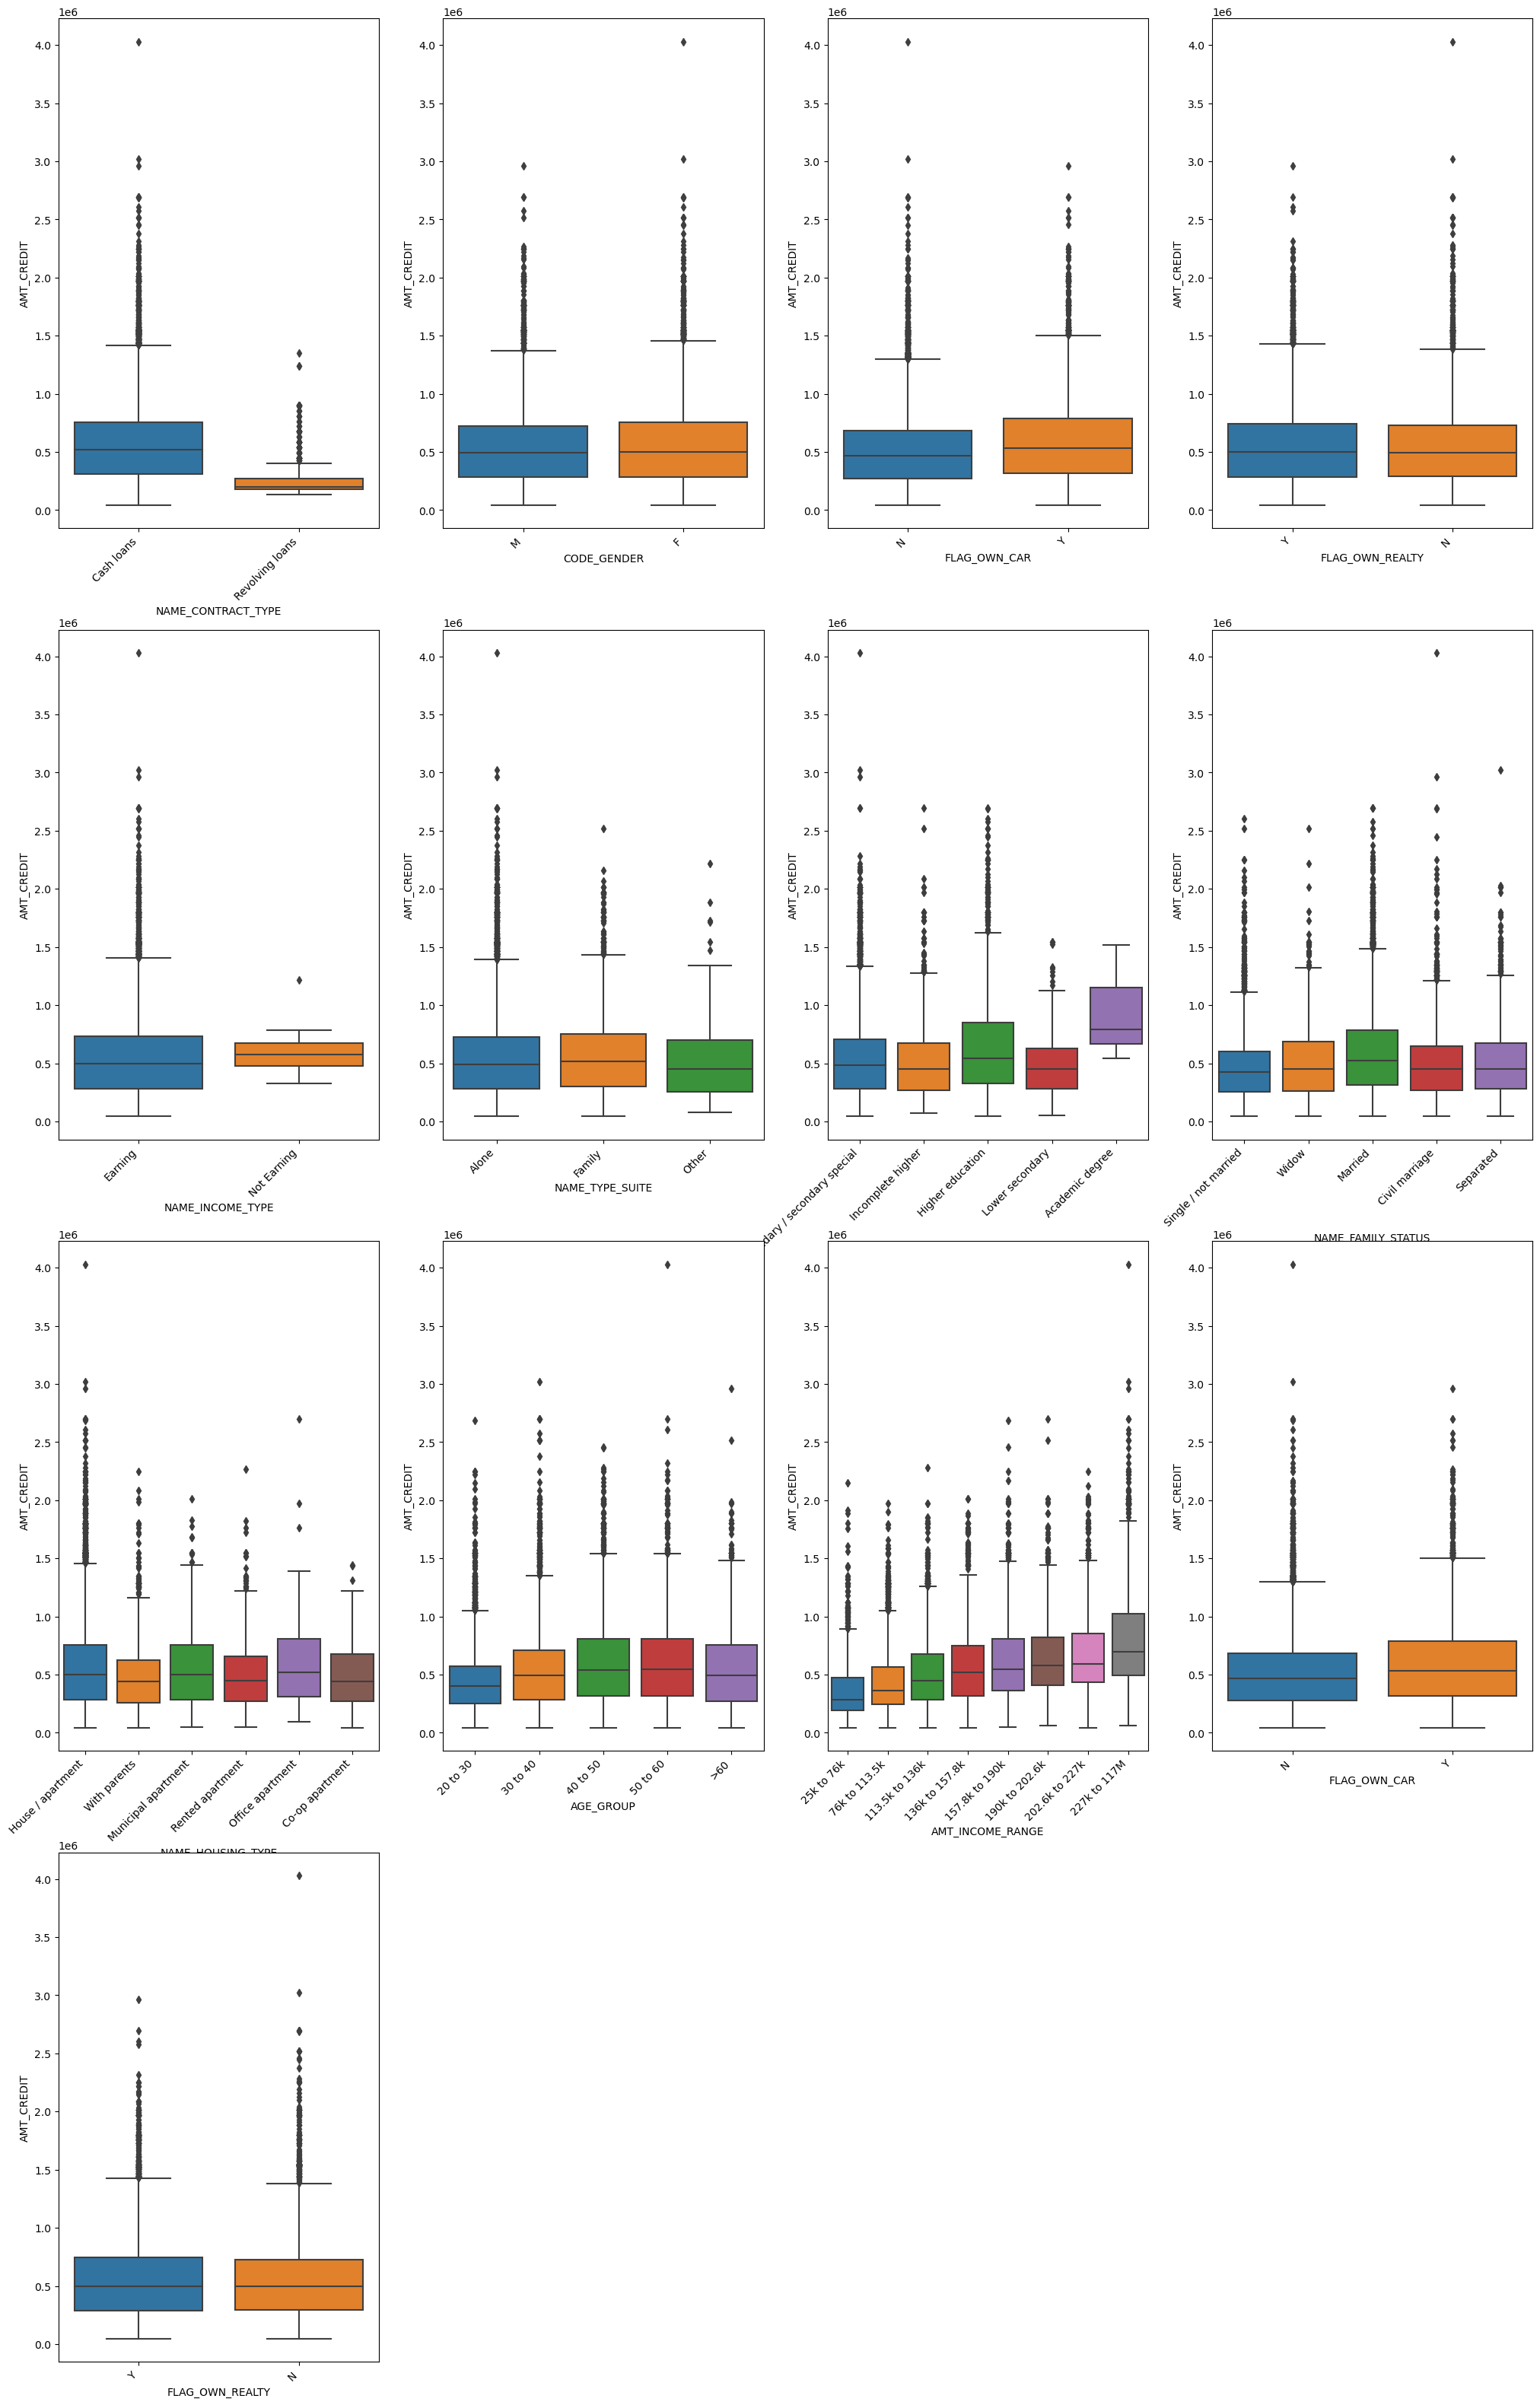

In [104]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,4,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=Defaulters)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

##### Analysis
    -Credit amount of the loans are very low for Revolving loans
    -There is no credit amount differnce between genders, client owning cars or realty.
    -The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
    -Higher income group have more loan amount credited.
    

##### Non_Defaulters

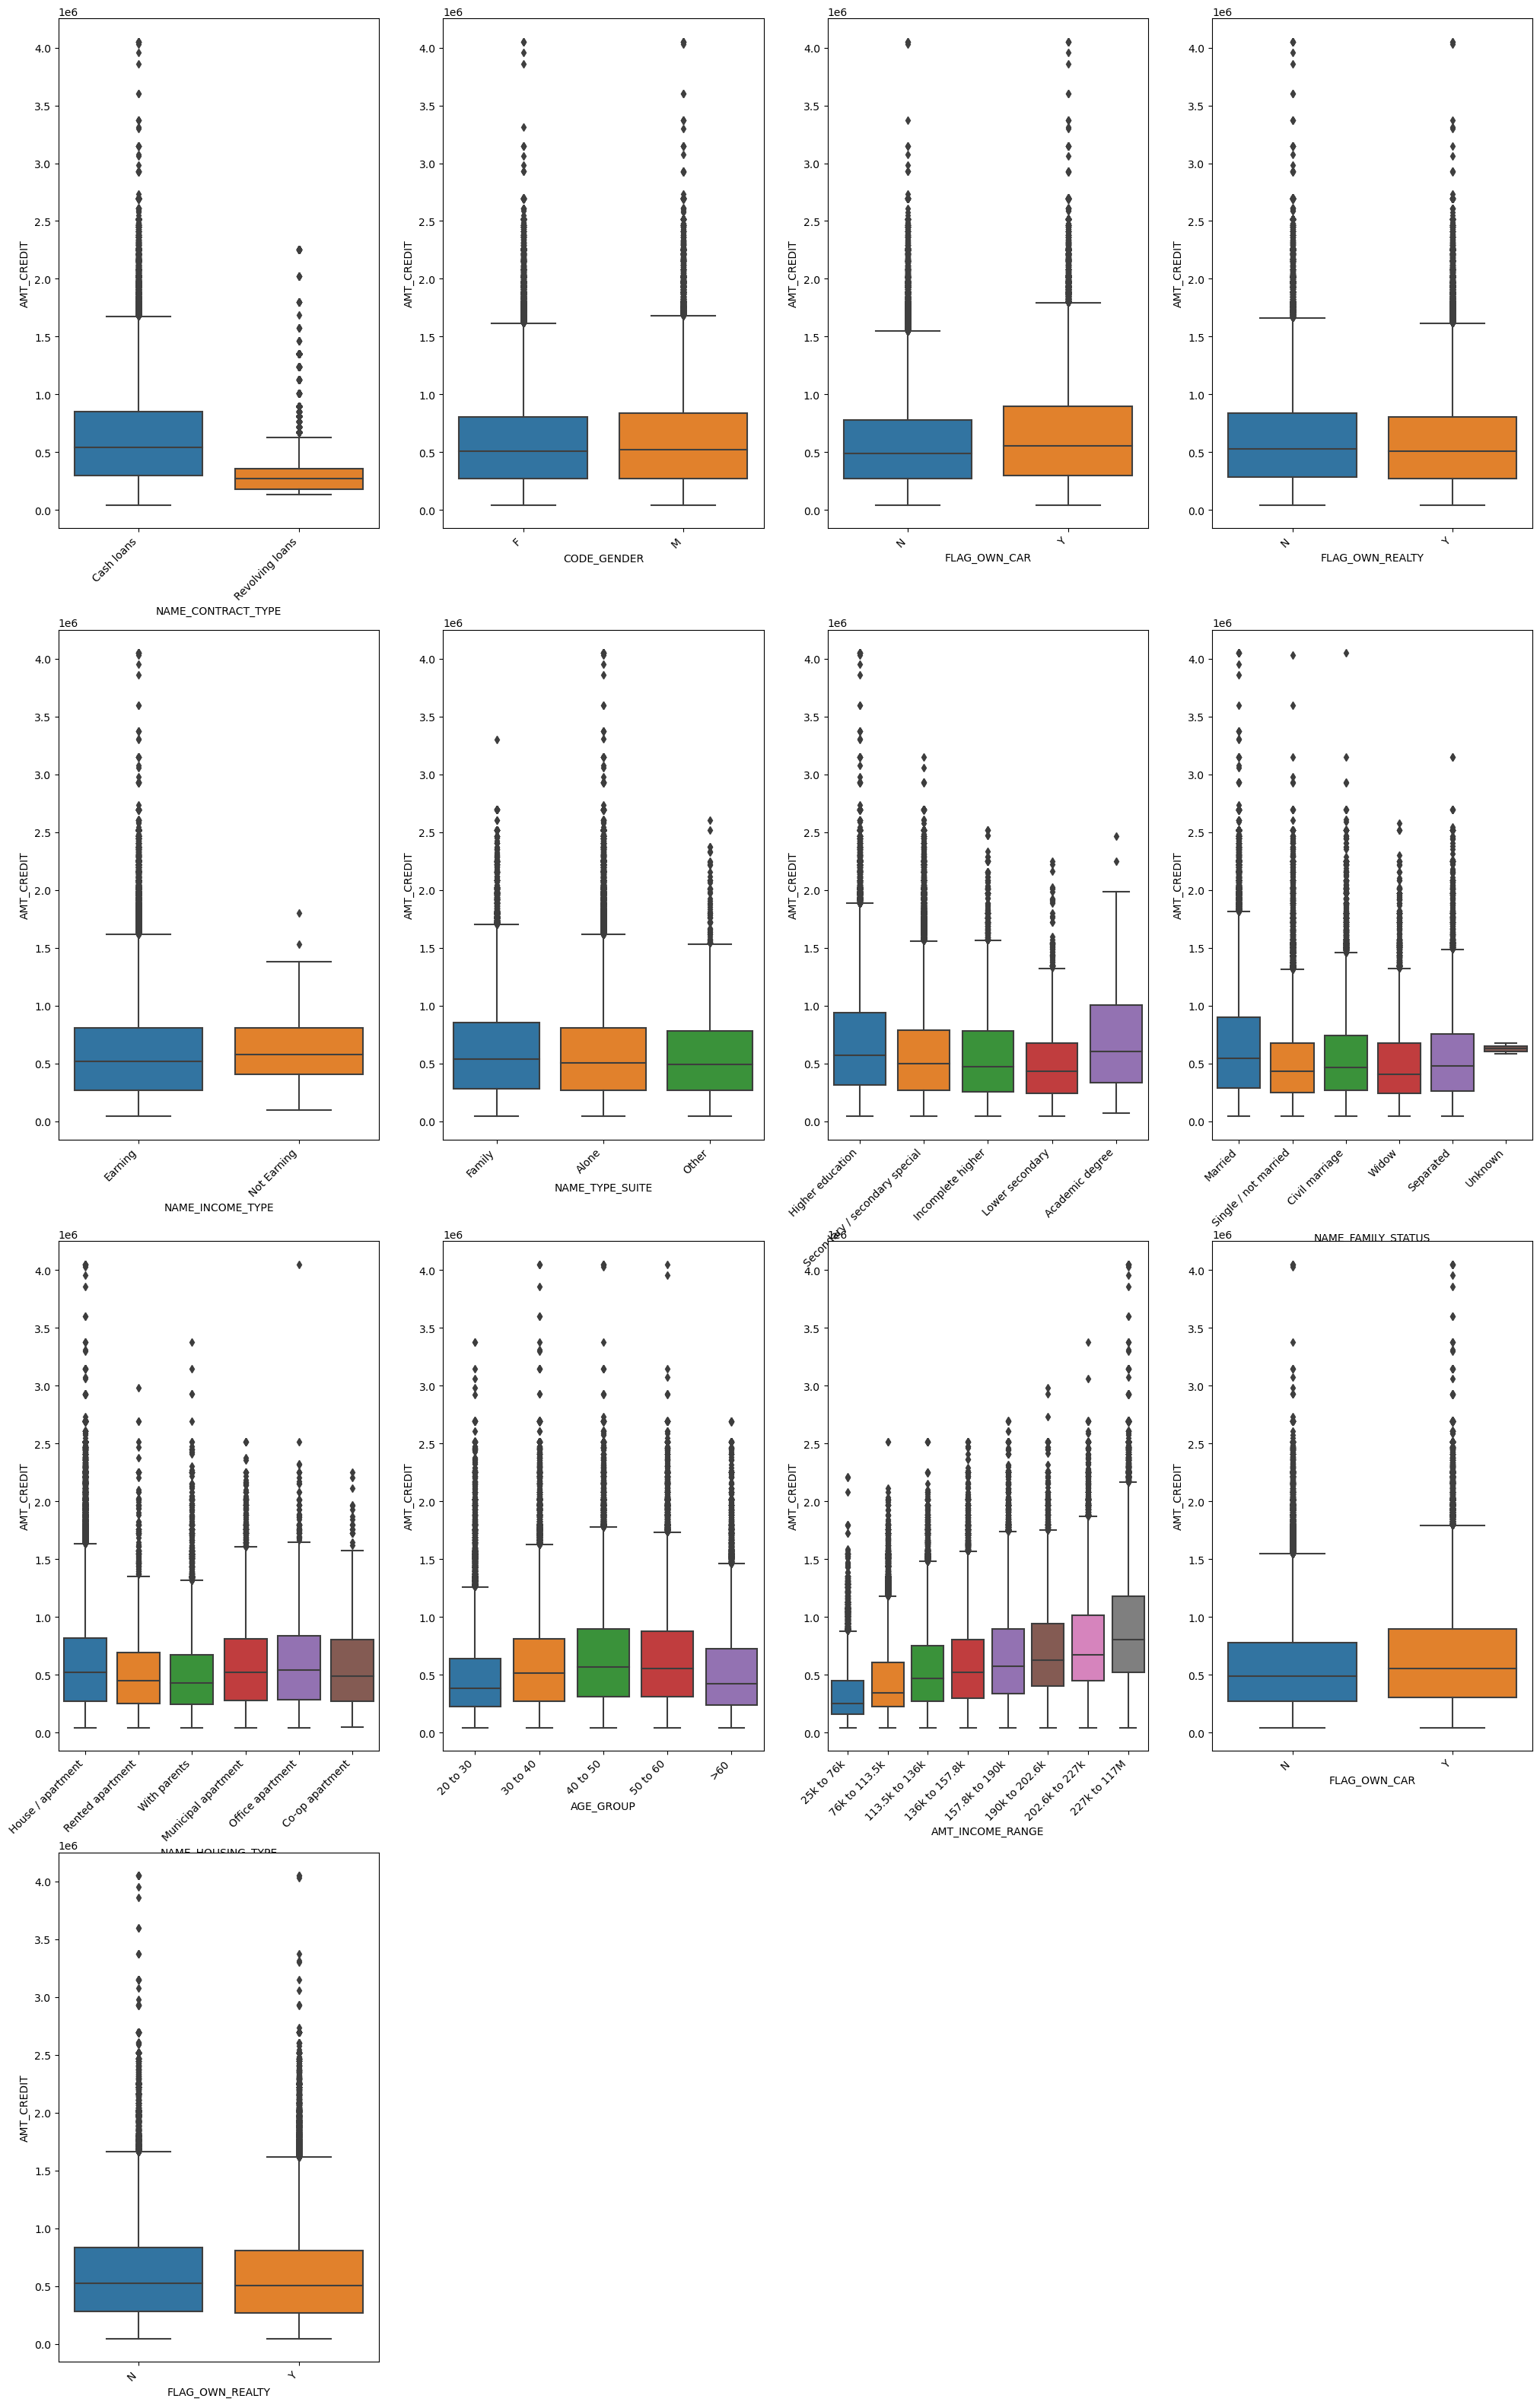

In [105]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,4,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=Non_Defaulters)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

##### Analysis
    -Credit amount of the loans are very low for Revolving loans
    -There is no credit amount differnce between genders, client owning cars or realty.
    -The middle aged (30-40years) group got more amount of loan credited compared to young and senior citizen.
    -Higher income group have more loan amount credited and lower the lowest.
    -Clients having higher external score have more loan amount.
    -Surprisingly the unemployed people have spike in credit amount of loan
    -Married people have more loan amount credited.

Text(0, 0.5, 'Defaulters')

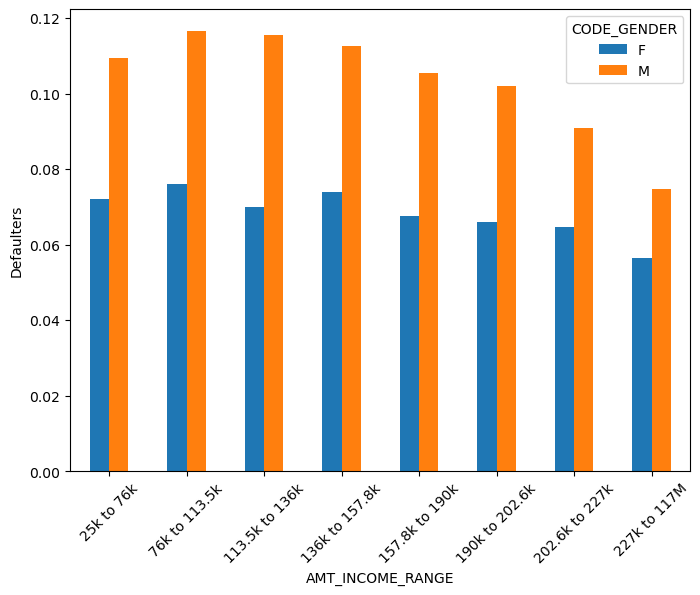

In [107]:
#Income group and gender, Defaulters
inp0_app.pivot_table(values='TARGET',index='AMT_INCOME_RANGE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('AMT_INCOME_RANGE')
plt.ylabel('Defaulters')

##### Analysis
We can see that Males are more likely defaulted than Females accross all income groups.

Text(0, 0.5, 'Defaulters')

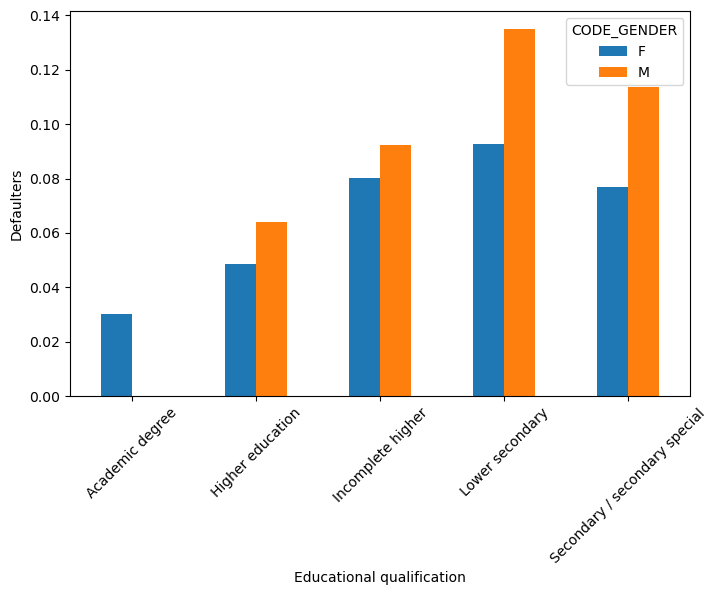

In [109]:
#Education and gender
inp0_app.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

##### Analysis
Lower secondary educated clients are more defaulted followed by Secondary and Incomplete higher educated clients.
The Higher educated people are less defaulted.
Accross all educated level Females are less defaulted than male.

Text(0, 0.5, 'Defaulters')

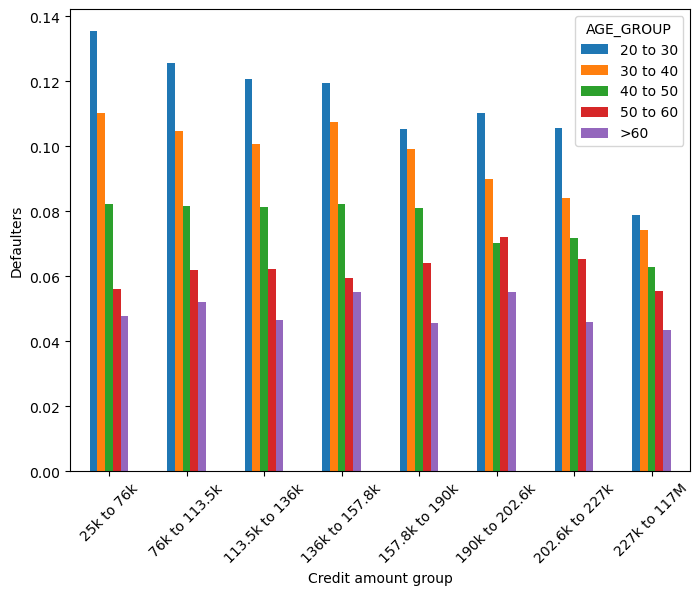

In [111]:
#Amount income range and Age group
inp0_app.pivot_table(values='TARGET',index='AMT_INCOME_RANGE',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
Young clients are more defaulted than Mid age and senior.
Young low income people are more defaulted.
For Mid age and senior people the default rate is almost same in all income group.

Text(0, 0.5, 'Defaulters')

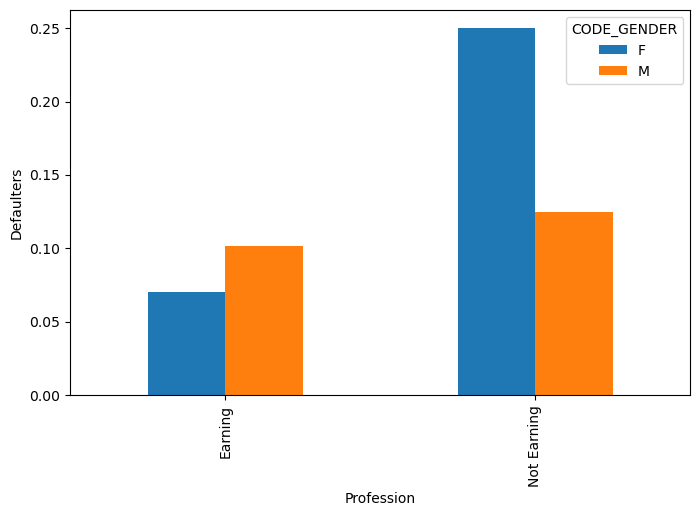

In [112]:
#Profession and Gender
inp0_app.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

##### Analysis
No surprise the unemployed clients are more defaulted.

Males are more defaulted with their respective professions compared to females.

Text(0, 0.5, 'Defaulters')

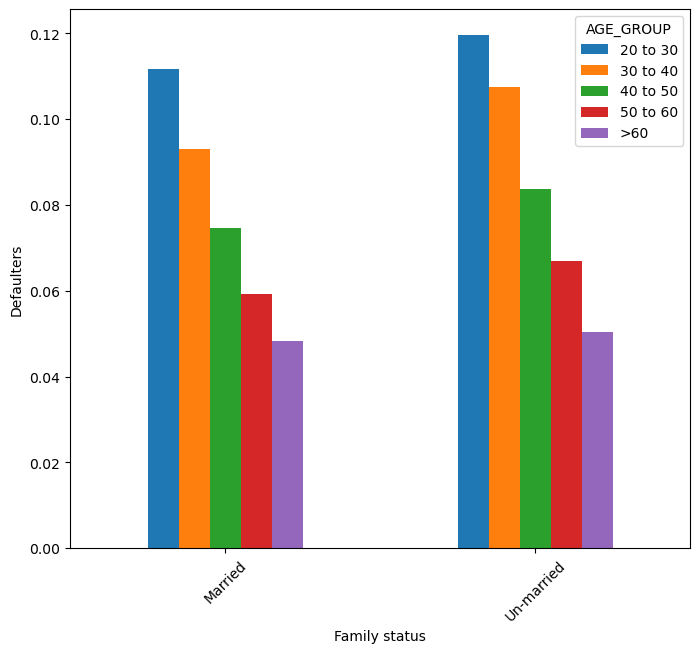

In [118]:
#Family status and age group
inp0_app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Across all family status the Young clients are more defaulted and Senior citizen are less.

Text(0, 0.5, 'Defaulters')

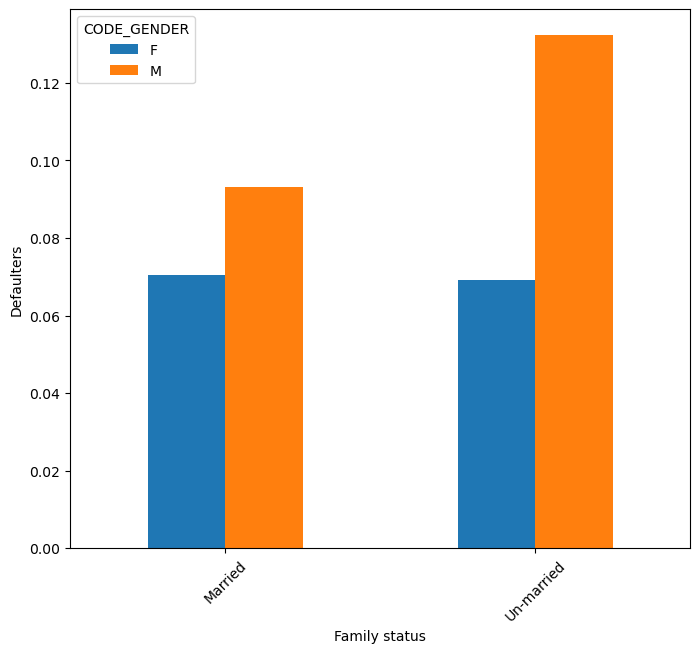

In [119]:
#Family Status and Code Gender
inp0_app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Across all family status the Male clients are more defaulted than Female.

In [94]:
Categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE_GROUP']

## PREVIOUS APPLICATION DATA

In [161]:
# Reading Previous application data
previous_application=pd.read_csv("previous_application.csv")

In [162]:
previous_application.shape

(1670214, 37)

In [163]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [164]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [165]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [166]:
null_previous_application=previous_application.isna().sum().sort_values(ascending=False)/previous_application.shape[0]*100

In [167]:
null_previous_application

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [168]:
#Identifying the columns with more than 40% missing values
cols_to_drop = null_previous_application[null_previous_application >= 40].index
cols_to_drop

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')

In [169]:
#Dropping the columns
previous_application.drop(columns=cols_to_drop, inplace=True)

In [170]:
previous_application.replace('XNA',np.nan,inplace=True)
previous_application.replace('XAP',np.nan,inplace=True)

In [171]:
#rechecking the shape after dropping
previous_application.shape

(1670214, 26)

In [172]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [173]:
#List and delete the columns, which are not much relevant for the analysis
previous_application.columns


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [174]:
irrelevant_columns = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON',
                      'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [175]:
# Delete the columns which are irrelevant for the analysis
previous_application = previous_application.drop(irrelevant_columns,axis=1)

In [176]:
#Converting DAYS_DECISION column into MONTH_DECISION column for readablity and analysis
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
previous_application['MONTH_DECISION'] = abs(previous_application['DAYS_DECISION']//30)
# Drop 'DAYS_DECISION' column
previous_application = previous_application.drop(['DAYS_DECISION'],axis=1)

In [177]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0     17145.0             Approved  Cash through the bank         Repeater   
1    679671.0             Approved                    NaN         Repeater   
2    136444.5             Approved  Cash through the bank         Repeater   
3    470790.0             Approved  Cash through the bank         Repeater   
4    404055.0              Refused  Cash through the bank         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               NaN   
1                 NaN           Cash            x-sell   
2                 NaN           Cash            x-sell   
3                 NaN           Cash            x-sell   
4                 NaN           Cash           walk-in   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  
0             Country-wide         12.0               3  
1           Contact center         36.0               6  
2  Credit and cash offices         12.0              11  
3  Credit and cash offices         12.0              18  
4  Credit and cash offices         24.0              27

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


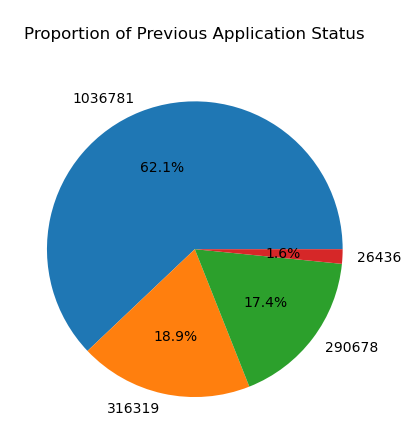

In [220]:
print(previous_application['NAME_CONTRACT_STATUS'].value_counts())
Approved_Status_Ratio=previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100
print(Approved_Status_Ratio)
plt.pie(Approved_Status_Ratio,labels=previous_application["NAME_CONTRACT_STATUS"].value_counts(), autopct='%1.1f%%')
plt.title("\nProportion of Previous Application Status\n")
plt.show()

## MERGING THE DATA SETS

In [178]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','AMT_INCOME_RANGE']

In [179]:
# Creating a dataset from current application for merging 
current_to_merge = inp0_app[cols_current]
current_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0    100002.0     1.0           M  Secondary / secondary special   
1    100003.0     0.0           F               Higher education   
2    100004.0     0.0           M  Secondary / secondary special   
3    100006.0     0.0           F  Secondary / secondary special   
4    100007.0     0.0           M  Secondary / secondary special   

  NAME_FAMILY_STATUS AGE_GROUP AMT_INCOME_RANGE  
0         Un-married  20 to 30   190k to 202.6k  
1            Married  40 to 50     227k to 117M  
2         Un-married  50 to 60       25k to 76k  
3            Married  50 to 60   113.5k to 136k  
4         Un-married  50 to 60   113.5k to 136k

In [180]:
# Merging both the datasets
df_merged = pd.merge(previous_application,current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0     17145.0             Approved  Cash through the bank         Repeater   
1    679671.0             Approved                    NaN         Repeater   
2    136444.5             Approved  Cash through the bank         Repeater   
3    470790.0             Approved  Cash through the bank         Repeater   
4    404055.0              Refused  Cash through the bank         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               NaN   
1                 NaN           Cash            x-sell   
2                 NaN           Cash            x-sell   
3                 NaN           Cash            x-sell   
4                 NaN           Cash           walk-in   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3     0.0           F   
1           Contact center         36.0               6     0.0           F   
2  Credit and cash offices         12.0              11     0.0           F   
3  Credit and cash offices         12.0              18     0.0           M   
4  Credit and cash offices         24.0              27     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP AMT_INCOME_RANGE  
0              Incomplete higher            Married  30 to 40   202.6k to 227k  
1  Secondary / secondary special            Married  50 to 60    76k to 113.5k  
2  Secondary / secondary special            Married  20 to 30       25k to 76k  
3  Secondary / secondary special            Married       >60     227k to 117M  
4  Secondary / secondary special            Married  20 to 30   157.8k to 190k

In [181]:
df_merged.shape

(1670214, 21)

In [182]:
len(df_merged[np.isnan(df_merged['TARGET'])])

256513

###### We can see that there are NaN values in the current application columns in the merged datasets. Because few SK_ID_CURR are present in the previous application dataset, but those IDs are not present in the current application dataset. Eg:- SK_ID_CURR == 176158 is present in the previous application but not in present. We will remove those such records.

In [183]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         


In [184]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [185]:
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0     17145.0             Approved  Cash through the bank         Repeater   
1    679671.0             Approved                    NaN         Repeater   
2    136444.5             Approved  Cash through the bank         Repeater   
3    470790.0             Approved  Cash through the bank         Repeater   
4    404055.0              Refused  Cash through the bank         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               NaN   
1                 NaN           Cash            x-sell   
2                 NaN           Cash            x-sell   
3                 NaN           Cash            x-sell   
4                 NaN           Cash           walk-in   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
3  Credit and cash offices         12.0              18       0           M   
4  Credit and cash offices         24.0              27       0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP AMT_INCOME_RANGE  
0              Incomplete higher            Married  30 to 40   202.6k to 227k  
1  Secondary / secondary special            Married  50 to 60    76k to 113.5k  
2  Secondary / secondary special            Married  20 to 30       25k to 76k  
3  Secondary / secondary special            Married       >60     227k to 117M  
4  Secondary / secondary special            Married  20 to 30   157.8k to 190k

In [187]:
Cat_cols=df_merged.select_dtypes(["object","category"]).columns.to_list()
Num_cols=df_merged.select_dtypes(["float","int"]).columns.to_list()
print(Cat_cols)
print(Num_cols)

['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'AGE_GROUP', 'AMT_INCOME_RANGE']
['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'CNT_PAYMENT', 'MONTH_DECISION', 'TARGET']


##### Univariate Ctaegorical Variables

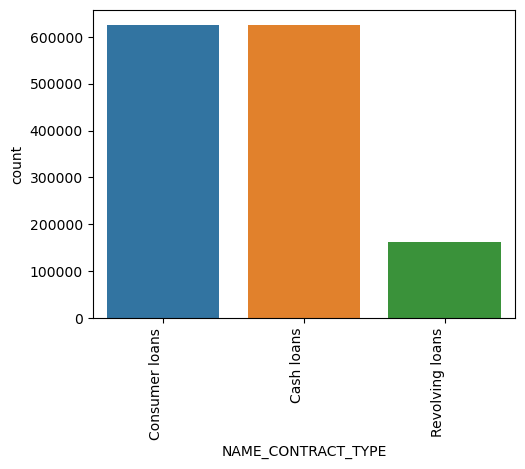

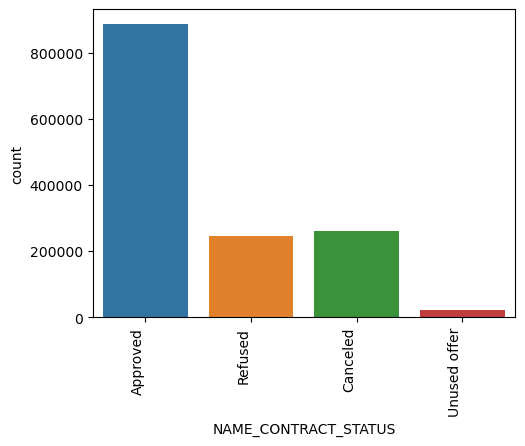

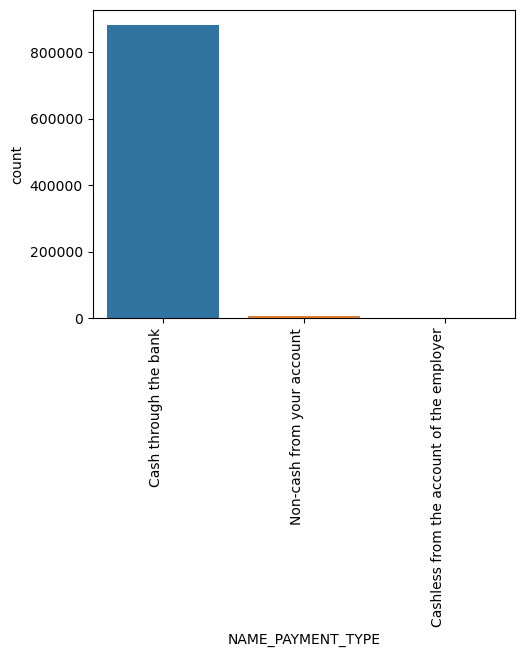

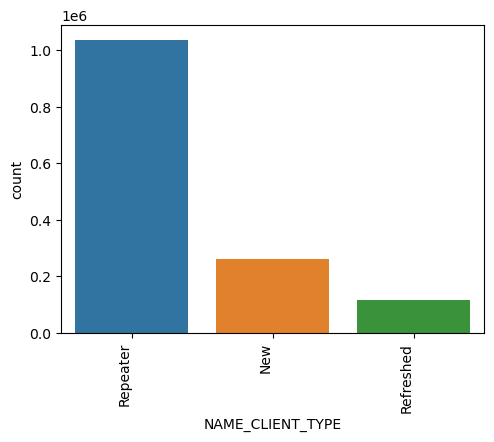

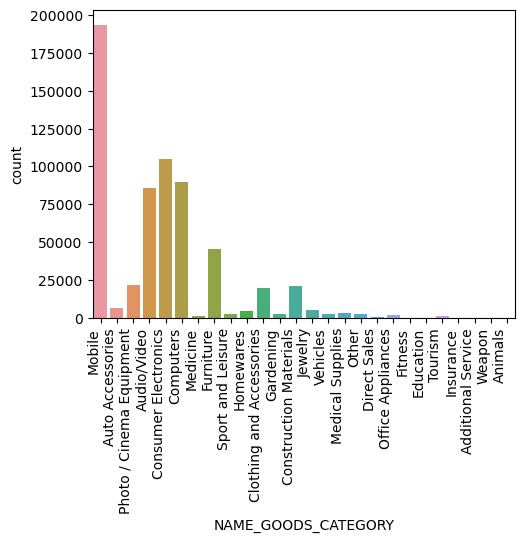

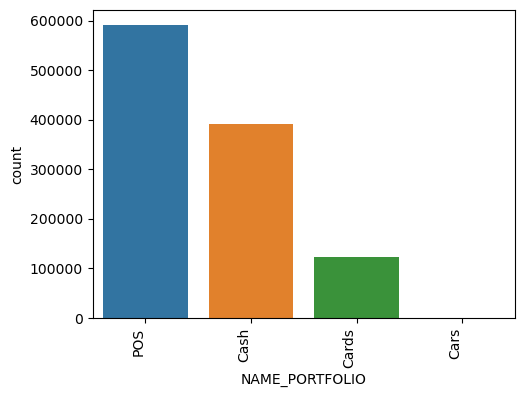

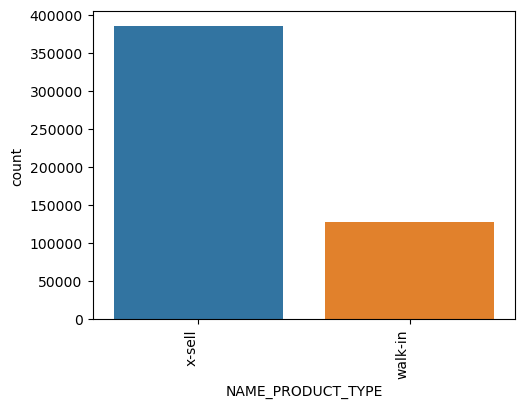

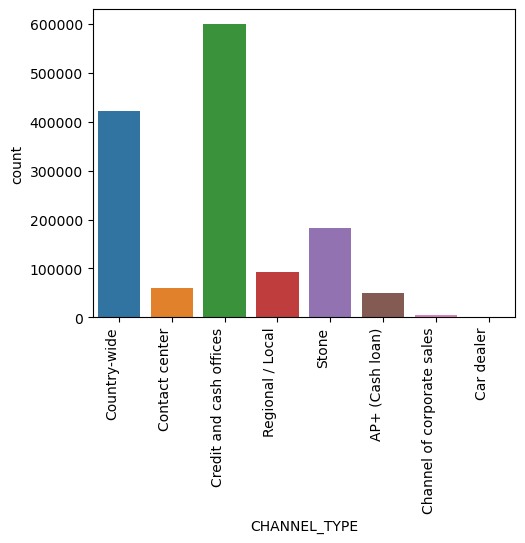

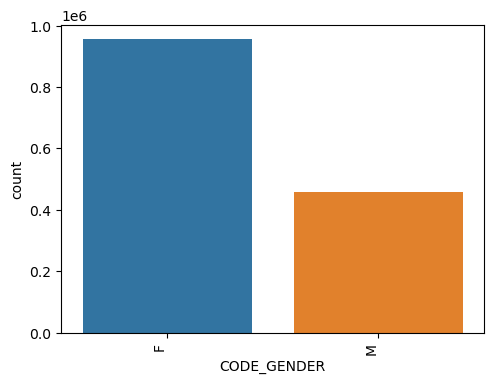

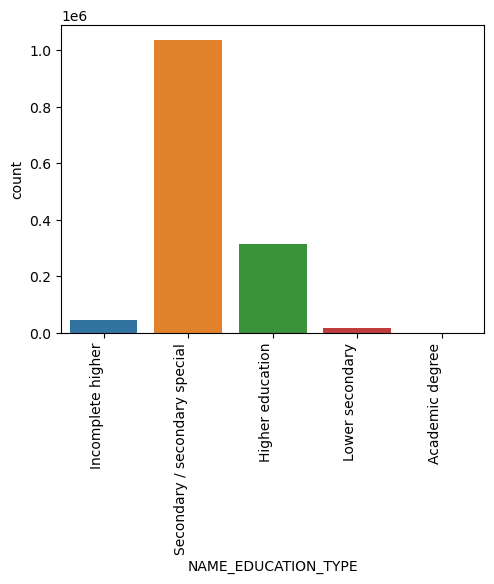

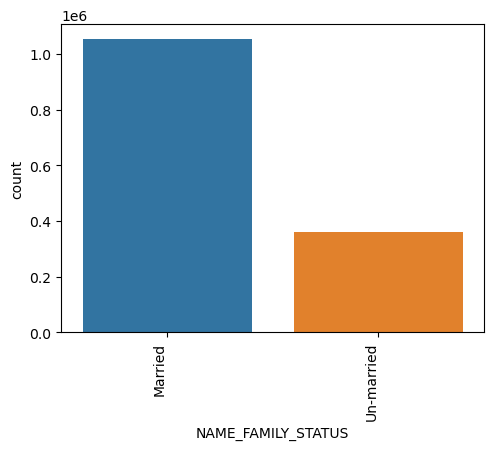

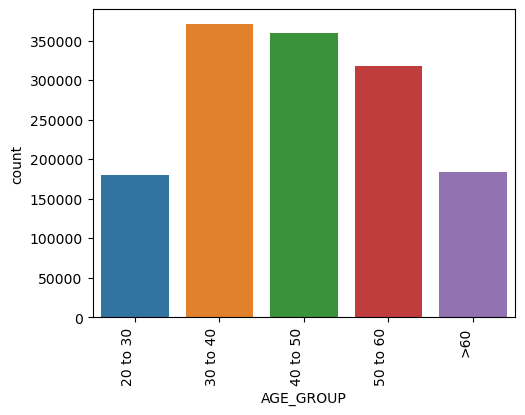

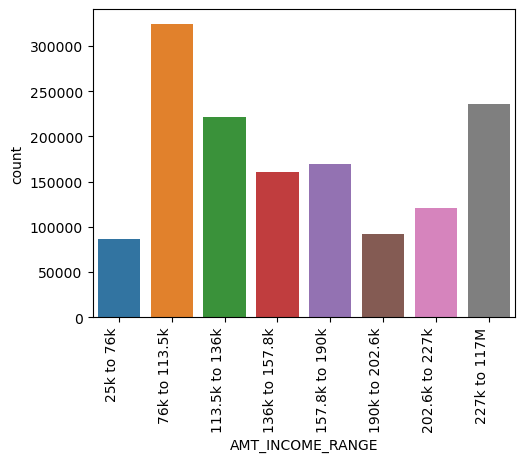

In [189]:
for i in Cat_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.countplot(x=df_merged[i])
    #plt.title('Non-Defaulters',size=8)
    plt.xticks(rotation=90, ha = 'right')

##### Univariate for continous variables

In [196]:
Num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'CNT_PAYMENT',
 'MONTH_DECISION',
 'TARGET']

In [197]:

elements_to_remove = ['SK_ID_PREV','SK_ID_CURR','TARGET']

# Remove elements using filter function
New_num_list = list(filter(lambda x: x not in elements_to_remove, Num_cols))
New_num_list

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'CNT_PAYMENT',
 'MONTH_DECISION']

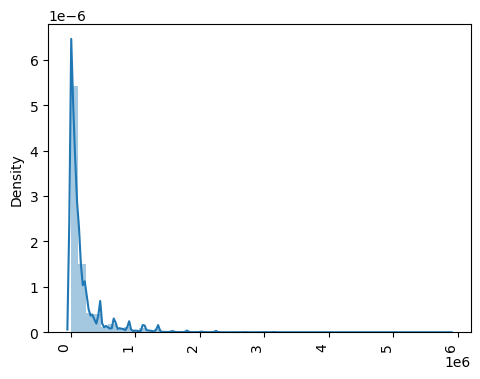

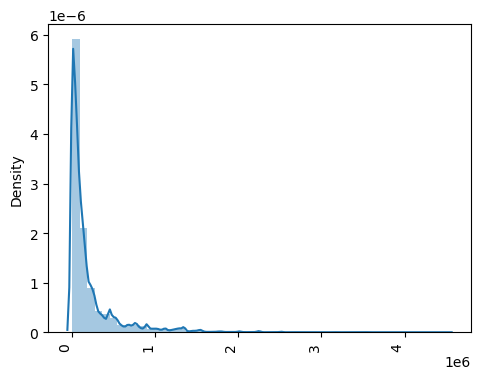

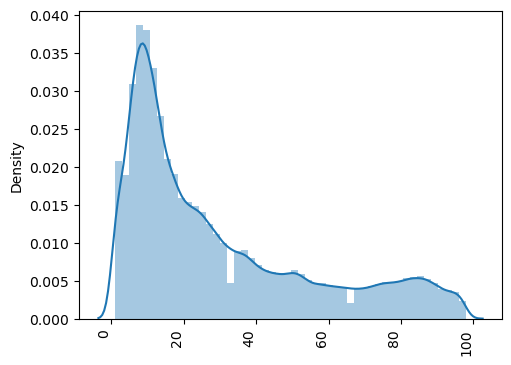

In [202]:
ncols= ['AMT_APPLICATION','AMT_CREDIT','MONTH_DECISION']
for i in ncols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(x=df_merged[i])
    plt.xticks(rotation=90, ha = 'right')

###### Analysis
Most of the applications were for the amount of below 250000 as we see from the above distribution.

The distribution of the credited amount of the loan was mostly in 250000 range.

We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

### Bivariate Analysis
Correlation of relevant numerical columns

In [204]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT','MONTH_DECISION']
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  CNT_PAYMENT  MONTH_DECISION
0          17145.0     17145.0     1730.430         12.0               3
1         607500.0    679671.0    25188.615         36.0               6
2         112500.0    136444.5    15060.735         12.0              11
3         450000.0    470790.0    47041.335         12.0              18
4         337500.0    404055.0    31924.395         24.0              27

In [205]:
# Corelation matrix
df_merged_corr.corr()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  CNT_PAYMENT  \
AMT_APPLICATION         1.000000    0.975683     0.809972     0.683056   
AMT_CREDIT              0.975683    1.000000     0.817977     0.675539   
AMT_ANNUITY             0.809972    0.817977     1.000000     0.398084   
CNT_PAYMENT             0.683056    0.675539     0.398084     1.000000   
MONTH_DECISION         -0.140755   -0.141280    -0.286150    -0.253430   

                 MONTH_DECISION  
AMT_APPLICATION       -0.140755  
AMT_CREDIT            -0.141280  
AMT_ANNUITY           -0.286150  
CNT_PAYMENT           -0.253430  
MONTH_DECISION         1.000000

<Axes: >

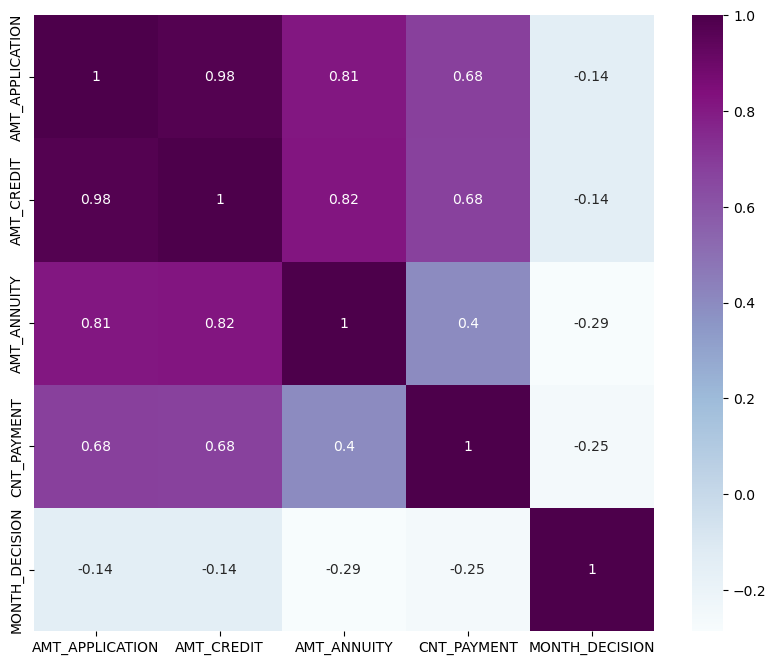

In [206]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="BuPu",annot=True)

##### Analysis
Highly corelated columns

    -AMT_APPLICATION and AMT_CREDIT
    -AMT_APPLICATION and AMT_ANNUITY
    -AMT_CREDIT and AMT_ANNUITY
    -Moderately corelated columns

Moderately coraleted columns

    -AMT_APPLICATION and CNT_PAYMENT
    -AMT_CREDIT and CNT_PAYMENT

### Bivariate analysis on continious variable

###### Application amount and credited amount

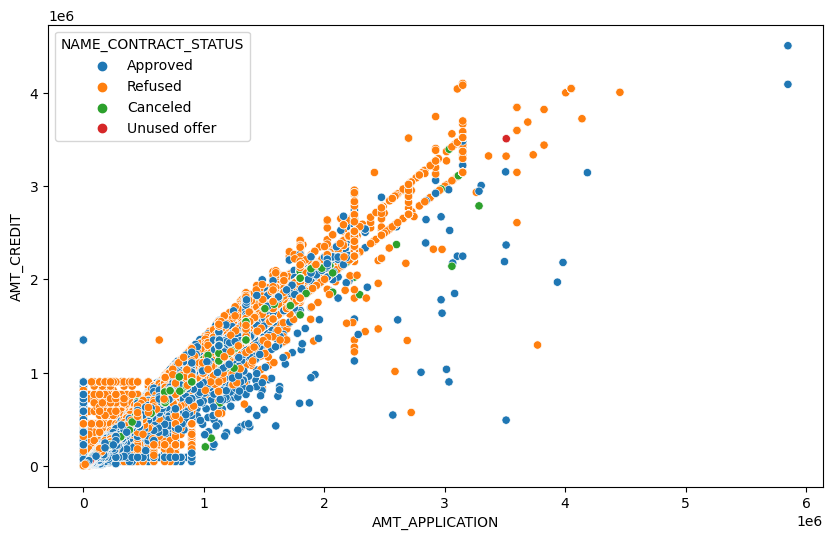

In [208]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='AMT_APPLICATION', y='AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()


##### Analysis
We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

##### Application amount and the month taken to take decision related to current application

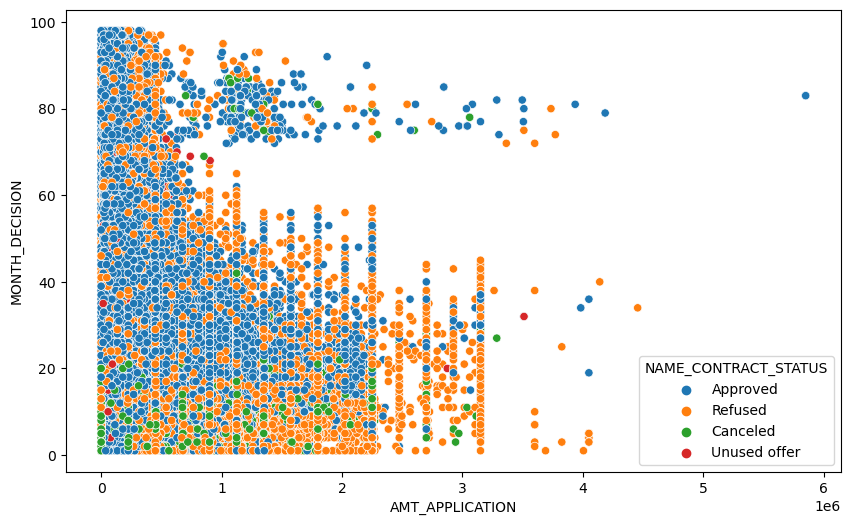

In [209]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='AMT_APPLICATION',y='MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

##### Analysis
We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application.

### Bivariate analysis on categorical variable

##### Credit amount of the loan of various categories

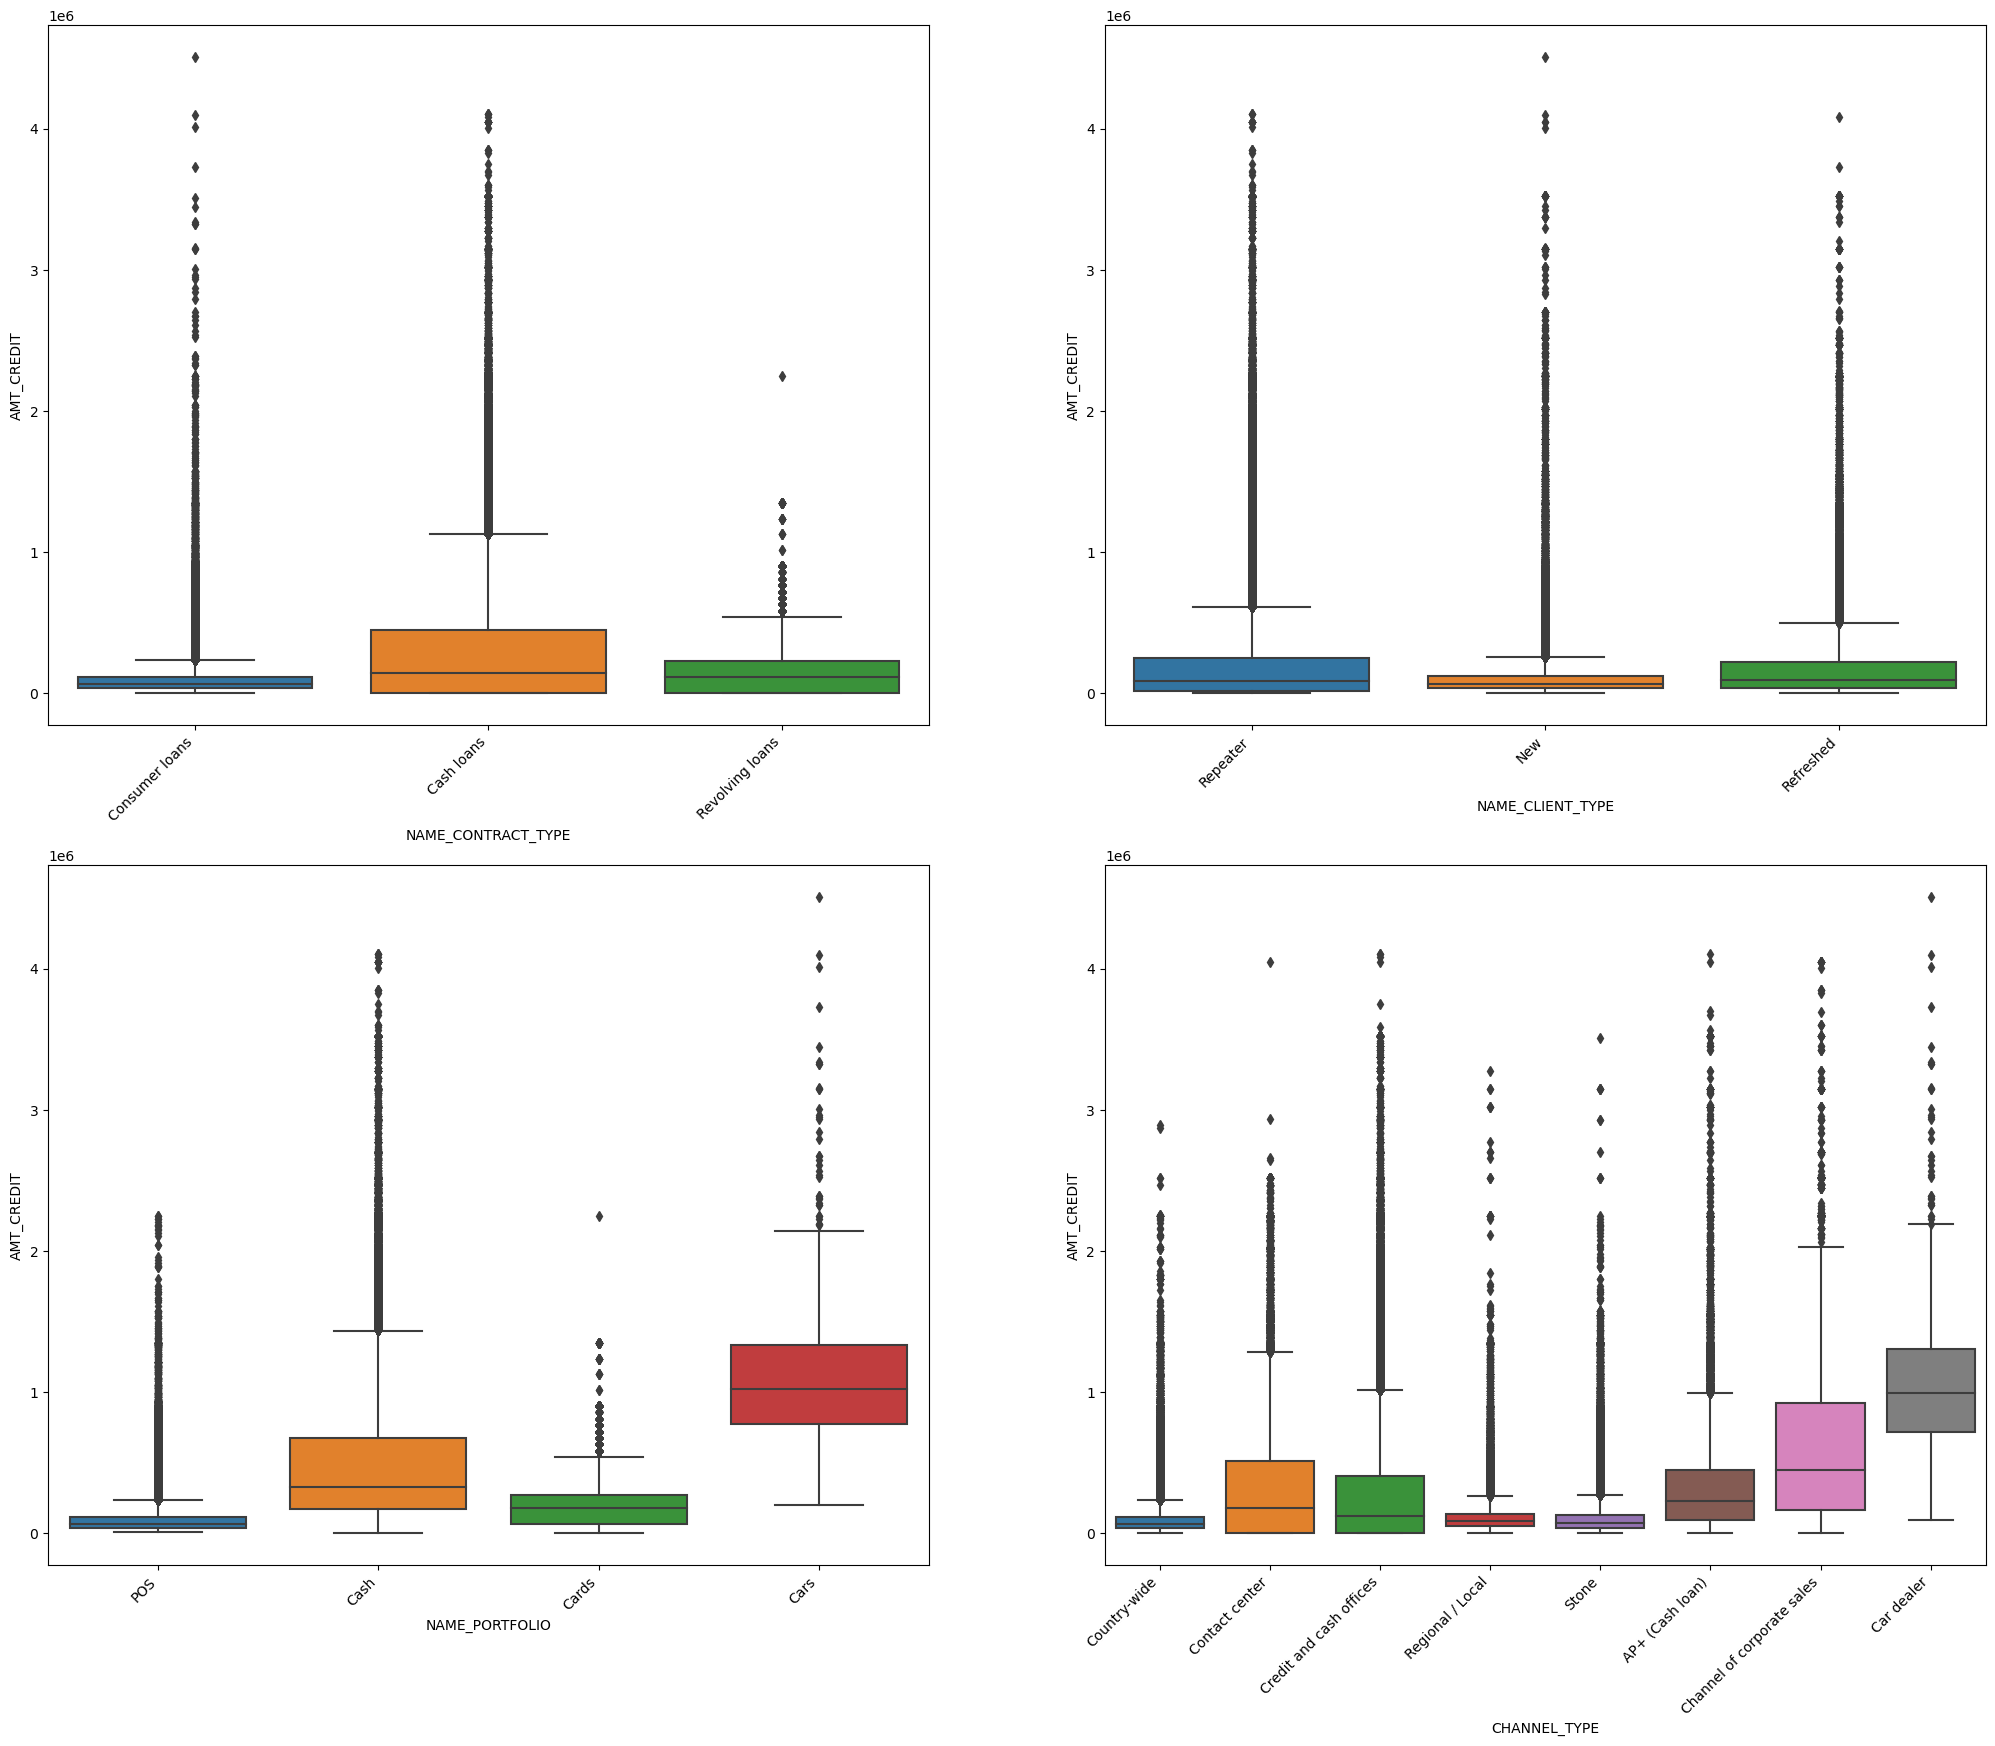

In [210]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
    -Cash loans are more credited in amount than Revolving and Consumer loans.
    -Repeater clients get more amount loan than new and refreshed clients.
    -The loan with portfolio Cars are more amount credited followed by Cash.
    -The credit amount of the loan is more from the application channel type as car dealer followed by Channel of corporate  sales,Credit and cash offices and Contact center. The amount is very less for Regional, Stone and Country-wide channels.

#### Anslysis of two segmented variables

##### Status and Client type

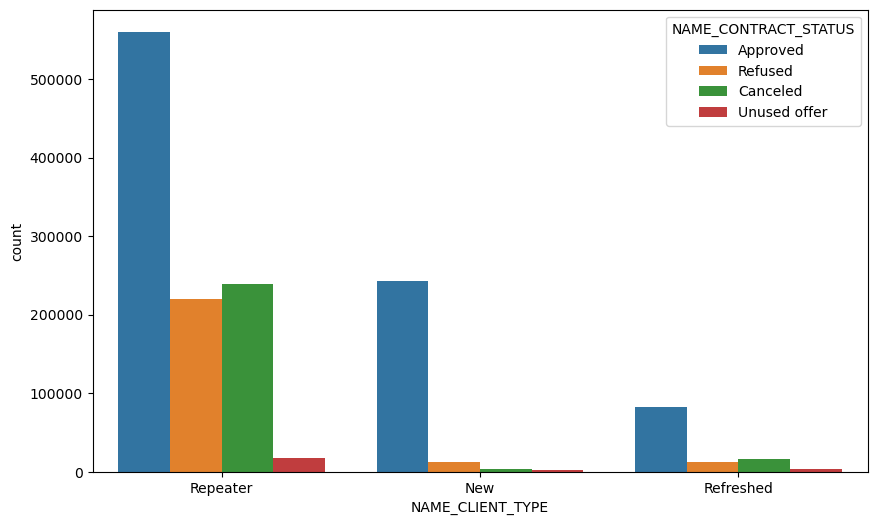

In [211]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )
plt.show()

##### Analysis
We see that the Repeater clients have more approved loans than New and Refreshed clients.

##### Current loan defaulter status with respect to previous loan application status

Text(0, 0.5, 'Current defaulters')

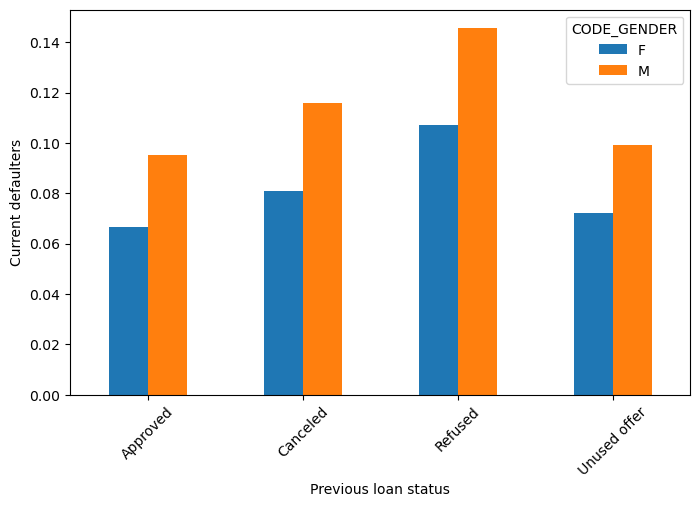

In [212]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females.

##### Current loan defaulter status with respect to previous loan application status and client types

Text(0, 0.5, 'Current defaulters')

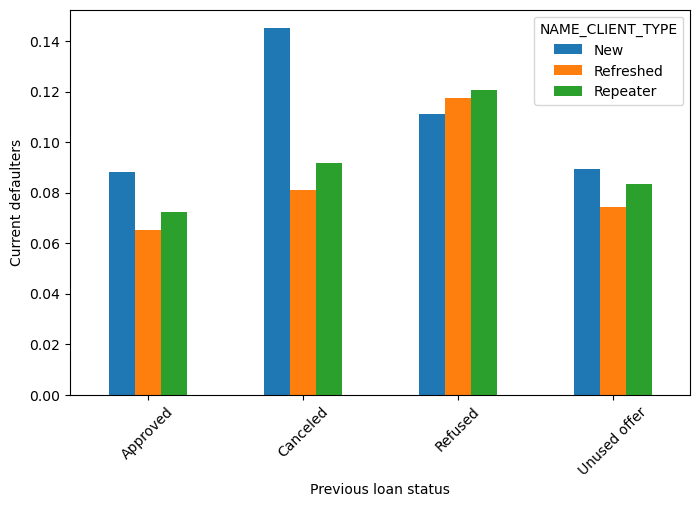

In [213]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
    -We can see that the Defaulters are more for previously Unused offers loan status clients, who were New.
    -For previously Approved status the New clients were more defaulted followed by Repeater.
    -For previously Refused applicants the Defaulters are more Refreshed clients.
    -For previously Canceled applicants the Defaulters are more New clients.

##### Current loan defaulter status with respect to previous loan application status and age group

Text(0, 0.5, 'Current defaulters')

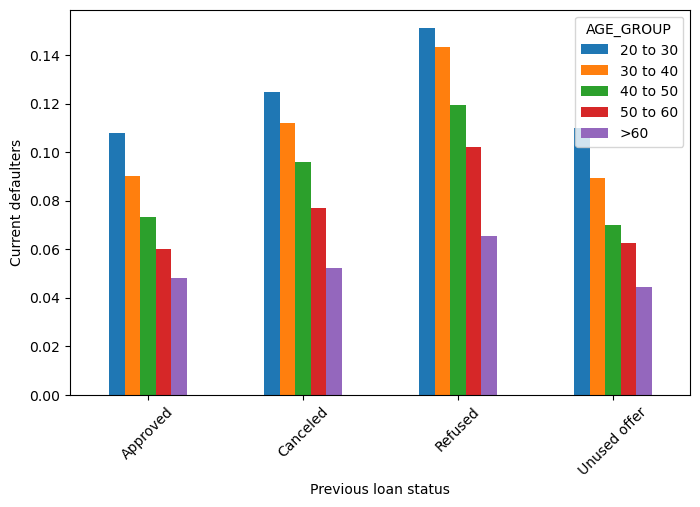

In [214]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
    -For all the previous status Young applicants are more defaulted.
    -For all the previous status Senior applicants are less defaulted compared to others.

##### Current loan defaulter status with respect to previous loan application status and income group

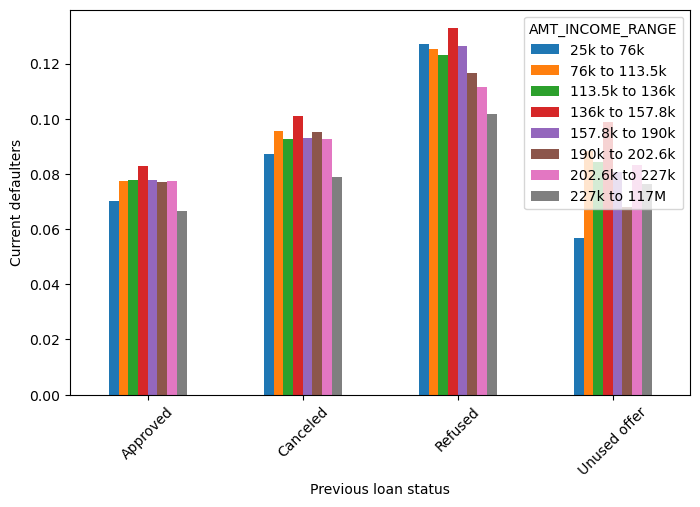

In [219]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AMT_INCOME_RANGE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()


##### Analysis
    -For previously Unused offer the Medium income group was more defaulted and Low income group is the least.
    -For other application status more or less all the income groups are equally defaulted.